<a href="https://colab.research.google.com/github/ibe-abu-chi/python_EDA/blob/master/ESRD_CKD_ANALYSIS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [71]:
pip install lifelines

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [264]:
#importing necessary libraries
import pandas as pd
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import statsmodels.api as sm
from sklearn.impute import SimpleImputer
from sklearn import linear_model
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.base import BaseEstimator
from sklearn.metrics import mean_absolute_error,mean_squared_error
from sklearn import preprocessing, svm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from lifelines import KaplanMeierFitter, CoxPHFitter
from lifelines.statistics import logrank_test
from scipy import stats
from sklearn.preprocessing import scale 
from sklearn import model_selection
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from statsmodels.formula.api import ols
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV
from numpy import arange
from sklearn.cross_decomposition import PLSRegression
from sklearn.linear_model import LassoCV
CKData = pd.read_excel('CKD_DATA.xlsx')
pd.set_option('max_columns', None)
#pd.set_option('max_rows', None)

THIS IS A DATA ANALYSIS OF PATIENTS WITH END STAGE RENAL DISEASE(ESRD). THE AIM OF THIS ANALYSIS IS TO KNOW WHAT THE LIKELY PREDICTIVE INDEX (PARAMETER) OF ESRD IN PATIENTS AT PRESENTATION TO A HEALTH FACILITY.


In [74]:
%autosave 60

Autosaving every 60 seconds


In [ ]:
#viewing the head of the data set
CKData

,YEAR,CATEGORY_CODE,AGE,GENDER,RACE,AGE AT BIOPSY,ONSET TO BIOPSY TIME,M,E,S,T,C,IgAstain,IgGstain,IgMstain,C3STAIN,WEIGHT,HEIGHT,BMI,P_PROTEINURIA,P_HEMATURIA,P_HTN,P_EDEMA,P_AKI,P_ESRD,P_NS,C3,C4,C3C4R,URIC ACID,B_PROTEIN,B_ALBUMIN,B_CHOLESTEROL,B_HEMATOCRIT,B_PLATELET,WBC,NEUTRO,LYMPHO,NLR,B_SBP,B_DBP,B_PP,B_MAP,24HRUPROTEIN,HEMATURIA,B_creatinine,B_eGFR,B_UPCR,B_ACE,B_STEROID,B_CYTOTOXICS,B_AZATHIOPRINE,Unnamed: 52,6_SBP,6_DBP,6_PP,6_MAP,6_PROTEINURIA,6_HEMATURIA,6_CREATININE,6_Egfr,6_UPCR,6_ACE,6_STEROID,6_IMMNU,6_AZATHIO,Unnamed: 66,1_SBP,1_DBP,1_PP,1_MAP,1_PROTEINURIA,HEMATURIA.1,1_creatinine,1_eGFR,1_UPCR,1_ACE,1_STEROID,1_CYTO,1_AZATHIOPRINE,Unnamed: 80,5_SBP,5_DBP,5_PROTEINURIA,5_HEMATURIA,5_CREATININE,5_eGFR,5_UPCR,Unnamed: 88,L_DATE,L_ACE,L_STEROID,L_CYTO,L_AZATHIOPRINE,L_SBP,L_DBP,L_PP,L_MAP,L_MAP.1,L_CRETININE,L_eGFR,L_HEMATURIA,L_PROTEINURIA,L_UPCR,Unnamed: 104,OUTCOME,FUT,Unnamed: 107
0,2012,12305,40,FEMALE,MELAYU,30,30,1,0.0,1,1,0.0,2+,1+,TRACE,NEG,73.0,1.53,31.18,1,0,1,0,0,0,0,NaN,NaN,NaN,NaN,71.0,35,3.78,12.5,311,11.9,6.33,2.87,2.2,139.0,96.0,43.0,110.0,1.40,NEG,121,53,0.11,1,0,0,0,NaN,115.0,72.0,43.0,86.000000,2+,NEG,119.0,54.0,0.26,NaN,0.0,0.0,0.0,NaN,151.0,109.0,42.0,123.0,2+,TRACE,119.0,54.0,0.26,1.0,0,0,0,NaN,109.0,65,NaN,2+,209,27,0.15,NaN,2022,1,0,0,0,113,72,41.0,86.0,110.0,803,5,-,-,0.67,NaN,ESRD,120,NaN
1,2012,4292,38,FEMALE,MELAYU,28,36,1,0.0,1,1,0.0,3+,TRACE,2+,2+,57.0,-,NaN,1,1,1,0,0,0,0,NaN,NaN,NaN,362.0,68.0,33,NaN,11.7,413,10.7,7.74,1.91,4.1,120.0,81.0,39.0,94.0,1.34,2+,82,86,0.40,0,0,0,0,NaN,129.0,80.0,49.0,96.000000,TRACE,TRACE,123.0,53.0,0.04,1.0,0.0,0.0,0.0,NaN,142.0,100.0,42.0,114.0,2+,1+,92.0,75.0,0.16,1.0,0,0,0,NaN,179.0,122,NaN,3+,258,21,0.18,NaN,2022,1,0,0,0,140,90,50.0,107.0,137.0,417,11,TRACE,1+,0.08,NaN,50PERC,60,NaN
2,2012,3213,38,FEMALE,MELAYU,27,9,1,NaN,1,1,1.0,2+,NEG,1+,NEG,52.0,-,NaN,1,0,1,0,0,0,0,NaN,NaN,NaN,292.0,63.0,35,NaN,12.1,433,13.1,10.90,1.40,7.8,149.0,103.0,46.0,118.0,2.60,NEG,74,98,0.26,1,1,0,0,NaN,145.0,103.0,42.0,117.000000,NEG,NEG,73.0,100.0,0.22,1.0,1.0,0.0,1.0,NaN,129.0,84.0,45.0,99.0,TRACE,TRACE,64.0,116.0,0.12,1.0,1,0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2016,1,1,0,0,142,99,43.0,113.0,146.0,59,120,1+,0,0.09,NaN,NO,48,NaN
3,2012,10911,41,FEMALE,MELAYU,31,10,0,1.0,1,0,1.0,1+,1+,1+,NEG,80.0,NaN,NaN,1,0,0,1,0,0,0,2.16,0.72,3.00,NaN,73.0,39,6.97,13.3,365,15.9,11.90,3.09,3.9,132.0,78.0,54.0,96.0,10.94,NEG,59,120,0.14,0,1,0,0,NaN,121.0,83.0,38.0,96.000000,2+,NEG,74.0,96.0,0.02,1.0,1.0,0.0,0.0,NaN,148.0,97.0,51.0,114.0,NEG,2+,76.0,92.0,0.02,1.0,0,0,0,NaN,101.0,70,NaN,NEG,65,108,0.02,NaN,2022,1,0,0,0,138,85,53.0,103.0,131.0,70,96,1+,TRACE,0.02,NaN,NO,120,NaN
4,2012,7084,34,MALE,MELAYU,24,5,0,1.0,1,0,1.0,3+,NEG,2+,1+,98.0,1.69,34.31,0,0,0,1,0,0,1,NaN,NaN,NaN,NaN,50.0,20,8.65,13.2,310,7.3,3.97,2.52,1.6,135.0,82.0,53.0,100.0,9.20,NEG,76,124,0.63,0,0,1,0,NaN,124.0,67.0,57.0,86.000000,NEG,NEG,75.0,125.0,NaN,1.0,1.0,0.0,0.0,NaN,126.0,80.0,46.0,95.0,3+,TRACE,76.0,96.0,0.19,0.0,1,1,0,NaN,118.0,68,NaN,NEG,75,121,0.01,NaN,2022,0,1,1,0,120,81,39.0,94.0,121.0,91,98,TRACE,4+,0.31,NaN,NO,120,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76,2020,3464,34,MALE,MELAYU,32,12,1,0.0,1,1,0.0,2+,NEG,NEG,2+,119.4,1.74,39.44,1,1,0,0,0,0,0,1.45,0.25,5.80,526.0,NaN,39,5.08,15.4,262,9.5,5.22,3.52,1.5,144.0,88.0,56.0,107.0,NaN,2+,121,70,0.20,0,0,0,0,NaN,142.0,80.0,62.0,101.000000,3+,2+,148.0,55.0,0.15,1.0,0.0,0.0,0.0,NaN,151.0,93.0,58.0,112.0,2+,3+,160.0,37.0,0.14,1.0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NO,21,NaN
77,2017,4265,31,FEMALE,MELA

In [92]:
#SELECTING THE NEEDED COLUMNS FOR THE ANALYSIS
df1 = CKData[['AGE', 'AGE AT BIOPSY', 'GENDER', 'B_PROTEIN', 'B_ALBUMIN',	'B_CHOLESTEROL',	'B_HEMATOCRIT', 'B_PLATELET',	'WBC', 'IgMstain','IgGstain','IgAstain', 'C3STAIN',
                             'NEUTRO',	'LYMPHO',	'URIC ACID',	'B_SBP',	'B_DBP',	'B_PP', 'B_MAP',	'HEMATURIA',	'B_creatinine',
                             'B_eGFR',	'B_UPCR',	'B_ACE',	'B_STEROID',	'B_CYTOTOXICS',	'B_AZATHIOPRINE', 'ONSET TO BIOPSY TIME', 'FUT', 'OUTCOME']]

In [ ]:
#showing last 10 observations in the data newly created data column called df1
df1.tail(10)

,AGE,AGE AT BIOPSY,GENDER,B_PROTEIN,B_ALBUMIN,B_CHOLESTEROL,B_HEMATOCRIT,B_PLATELET,WBC,IgMstain,IgGstain,IgAstain,C3STAIN,NEUTRO,LYMPHO,URIC ACID,B_SBP,B_DBP,B_PP,B_MAP,HEMATURIA,B_creatinine,B_eGFR,B_UPCR,B_ACE,B_STEROID,B_CYTOTOXICS,B_AZATHIOPRINE,ONSET TO BIOPSY TIME,FUT,OUTCOME
71,24,24,FEMALE,72.0,35,5.76,11.7,256,12.00,TRACE,NEG,2+,NEG,8.59,2.63,482.0,138.0,90.0,48.0,106.0,2+,121,55,0.29,1,0,0,0,60,6,NO
72,23,22,MALE,66.0,36,4.76,15.7,277,8.71,TRACE,NEG,3+,NEG,4.40,2.82,521.0,117.0,78.0,39.0,91.0,2+,93,103,0.09,0,1,0,0,12,6,NO
73,37,34,MALE,NaN,28,6.19,14.3,336,15.80,NEG,NEG,3+,3+,10.83,3.84,448.0,173.0,119.0,54.0,137.0,1+,378,18,0.76,1,0,0,0,12,6,ESRD
74,26,23,MALE,41.0,8,NaN,16.2,269,10.80,2+,NEG,2+,NEG,7.82,2.18,NaN,131.0,73.0,58.0,92.0,NEG,74,126,0.81,1,1,0,0,3,38,NO
75,26,24,FEMALE,71.0,34,5.76,12.1,295,8.00,NEG,NEG,1+,NEG,5.18,1.70,NaN,125.0,60.0,65.0,82.0,3+,162,39,0.31,0,0,0,0,26,21,NO
76,34,32,MALE,NaN,39,5.08,15.4,262,9.50,NEG,NEG,2+,2+,5.22,3.52,526.0,144.0,88.0,56.0,107.0,2+,121,70,0.20,0,0,0,0,12,21,NO
77,31,25,FEMALE,54.0,22,9.65,10.9,388,7.00,1+,NEG,2+,1+,4.13,2.04,NaN,144.0,107.0,37.0,119.0,2+,207,29,0.94,1,1,0,0,40,10,ESRD
78,38,34,FEMALE,73.0,33,6.12,12.7,273,8.30,NEG,NEG,2+,NEG,4.04,3.32,399.0,138.0,83.0,55.0,101.0,NEG,90,74,0.17,1,0,0,0,44,18,NO
79,24,21,FEMALE,NaN,38,4.28,12.8,399,9.40,1+,NEG,3+,2+,6.48,2.17,308.0,129.0,69.0,60.0,89.0,2+,67,115,0.18,1,0,0,0,12,43,NO
80,34,27,MALE,50.0,18,5.71,15.6,410,7.50,1+,NEG,2+,NEG,4.28,2.35,428.0,134.0,85.0,49.0,101.0,2+,132,65,1.05,1,0,0,0,7,12,NO


In [94]:
#creating dummy variables for the outcome
df1['OUTCOME_d'] = np.where(df1['OUTCOME'] == 'ESRD', 2, (np.where(df1['OUTCOME'] == '50PERC', 1, 0)))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [95]:
conditions = [
    (df1['C3STAIN'] == 'NEG'),
    (df1['C3STAIN'] == 'TRACE'),
    (df1['C3STAIN'] == '1+'),
    (df1['C3STAIN'] == '2+'),
    (df1['C3STAIN'] == 'nan'),
    (df1['C3STAIN'] == '3+')
]

values = [-1, 0.5, 1, 2, 0, 3]

df1['C3S'] = np.select(conditions, values)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


In [96]:
conditions = [
    (df1['IgMstain'] == 'NEG'),
    (df1['IgMstain'] == 'TRACE'),
    (df1['IgMstain'] == '1+'),
    (df1['IgMstain'] == '2+'),
    (df1['IgMstain'] == 'nan'),
]

values = [-1, 0.5, 1, 2, 0]

df1['IgM'] = np.select(conditions, values)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


In [97]:
conditions = [
    (df1['IgAstain'] == '3+'),
    (df1['IgAstain'] == '1+'),
    (df1['IgAstain'] == '2+'),
    (df1['IgAstain'] == 'nan'),
]

values = [3, 1, 2, 0]

df1['IgA'] = np.select(conditions, values)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


In [98]:
conditions = [
    (df1['IgGstain'] == 'NEG'),
    (df1['IgGstain'] == 'TRACE'),
    (df1['IgGstain'] == '1+'),
    (df1['IgGstain'] == '2+'),
    (df1['IgGstain'] == 'nan'),
]

values = [0, 0.5, 1, 2, -1]

df1['IgG'] = np.select(conditions, values)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


In [99]:
%lsmagic

Available line magics:
%alias  %alias_magic  %autoawait  %autocall  %automagic  %autosave  %bookmark  %cat  %cd  %clear  %colors  %conda  %config  %connect_info  %cp  %debug  %dhist  %dirs  %doctest_mode  %ed  %edit  %env  %gui  %hist  %history  %killbgscripts  %ldir  %less  %lf  %lk  %ll  %load  %load_ext  %loadpy  %logoff  %logon  %logstart  %logstate  %logstop  %ls  %lsmagic  %lx  %macro  %magic  %man  %matplotlib  %mkdir  %more  %mv  %notebook  %page  %pastebin  %pdb  %pdef  %pdoc  %pfile  %pinfo  %pinfo2  %pip  %popd  %pprint  %precision  %prun  %psearch  %psource  %pushd  %pwd  %pycat  %pylab  %qtconsole  %quickref  %recall  %rehashx  %reload_ext  %rep  %rerun  %reset  %reset_selective  %rm  %rmdir  %run  %save  %sc  %set_env  %shell  %store  %sx  %system  %tb  %tensorflow_version  %time  %timeit  %unalias  %unload_ext  %who  %who_ls  %whos  %xdel  %xmode

Available cell magics:
%%!  %%HTML  %%SVG  %%bash  %%bigquery  %%capture  %%debug  %%file  %%html  %%javascript  %%js  %%late

In [ ]:
#checking out the gender column
df1['GENDER'].describe()

count         81
unique         2
top       FEMALE
freq          60
Name: GENDER, dtype: object

In [ ]:
#checking out the haematuria column
df1['HEMATURIA'].describe()

count     81
unique     6
top       2+
freq      24
Name: HEMATURIA, dtype: object

In [ ]:
#checking out the outcome column
df1['OUTCOME'].describe()

count     81
unique     3
top       NO
freq      60
Name: OUTCOME, dtype: object

In [ ]:
#viewing all columns with empty observation
df1[df1.columns[df1.isna().any()]]

,B_PROTEIN,B_CHOLESTEROL,IgMstain,IgGstain,IgAstain,C3STAIN,URIC ACID,B_SBP,B_DBP,B_PP,B_MAP,B_UPCR,ONSET TO BIOPSY TIME
0,71.0,3.78,TRACE,1+,2+,NEG,NaN,139.0,96.0,43.0,110.0,0.11,30
1,68.0,NaN,2+,TRACE,3+,2+,362.0,120.0,81.0,39.0,94.0,0.40,36
2,63.0,NaN,1+,NEG,2+,NEG,292.0,149.0,103.0,46.0,118.0,0.26,9
3,73.0,6.97,1+,1+,1+,NEG,NaN,132.0,78.0,54.0,96.0,0.14,10
4,50.0,8.65,2+,NEG,3+,1+,NaN,135.0,82.0,53.0,100.0,0.63,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
76,NaN,5.08,NEG,NEG,2+,2+,526.0,144.0,88.0,56.0,107.0,0.20,12
77,54.0,9.65,1+,NEG,2+,1+,NaN,144.0,107.0,37.0,119.0,0.94,40
78,73.0,6.12,NEG,NEG,2+,NEG,399.0,138.0,83.0,55.0,101.0,0.17,44
79,NaN,4.28,1+,NEG,3+,2+,308.0,129.0,69.0,60.0,89.0,0.18,12


In [100]:
#Filling out missing values with mean valuee of the column
df1[['B_PROTEIN',	'B_CHOLESTEROL',	'B_SBP',	'B_DBP', 'ONSET TO BIOPSY TIME',	'B_PP',	'B_MAP',	'B_UPCR', 'URIC ACID']] = df1[
    ['B_PROTEIN', 'ONSET TO BIOPSY TIME','B_CHOLESTEROL',	'B_SBP', 'B_DBP',	'B_PP',	'B_MAP','B_UPCR', 'URIC ACID']].fillna(df1[
        ['B_PROTEIN', 'B_CHOLESTEROL', 'ONSET TO BIOPSY TIME',	'B_SBP','B_DBP', 'B_PP','B_MAP',	'B_UPCR', 'URIC ACID']].mean())

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  after removing the cwd from sys.path.


In [101]:
#removing empty spaces from the columns of gender, outcome and hemturia
for col in ["GENDER", "OUTCOME", "HEMATURIA", "IgGstain", "IgAstain", "IgMstain", "C3STAIN", "B_CHOLESTEROL"]:
    df1[col] = df1[col].replace("\s+-", " ", regex=True).str.strip()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
#checking if any column still has empty observation
df1.isnull().any()

AGE                     False
AGE AT BIOPSY           False
GENDER                  False
B_PROTEIN               False
B_ALBUMIN               False
B_CHOLESTEROL            True
B_HEMATOCRIT            False
B_PLATELET              False
WBC                     False
IgMstain                 True
IgGstain                 True
IgAstain                 True
C3STAIN                  True
NEUTRO                  False
LYMPHO                  False
URIC ACID                True
B_SBP                   False
B_DBP                   False
B_PP                    False
B_MAP                   False
HEMATURIA               False
B_creatinine            False
B_eGFR                  False
B_UPCR                  False
B_ACE                   False
B_STEROID               False
B_CYTOTOXICS            False
B_AZATHIOPRINE          False
ONSET TO BIOPSY TIME    False
FUT                     False
OUTCOME                 False
OUTCOME_d               False
C3S                     False
IgM       

In [ ]:
#checking the data type
df1['B_SBP'].dtype

dtype('float64')

In [102]:
#renaming a column in the dataset
df1.rename(columns={"ONSET TO BIOPSY TIME": "BIOPSY_TIME"}, inplace=True)


In [103]:
#renaming a column in the dataset
df1.rename(columns={"AGE AT BIOPSY": "BIOPSY_AGE"}, inplace=True)


In [104]:
df1.rename(columns={"URIC ACID": "URIC_ACID"}, inplace=True)

In [ ]:
df1

,AGE,BIOPSY_AGE,GENDER,B_PROTEIN,B_ALBUMIN,B_CHOLESTEROL,B_HEMATOCRIT,B_PLATELET,WBC,IgMstain,IgGstain,IgAstain,C3STAIN,NEUTRO,LYMPHO,URIC_ACID,B_SBP,B_DBP,B_PP,B_MAP,HEMATURIA,B_creatinine,B_eGFR,B_UPCR,B_ACE,B_STEROID,B_CYTOTOXICS,B_AZATHIOPRINE,BIOPSY_TIME,FUT,OUTCOME,OUTCOME_d,C3S,IgM,IgA,IgG
0,40,30,FEMALE,71.000000,35,NaN,12.5,311,11.9,TRACE,1+,2+,NEG,6.33,2.87,449.269231,3.780000,139.0,43.0,110.0,NEG,121,53,0.11,1,0,0,0,96.0,120,ESRD,2,-1.0,0.5,2,1.0
1,38,28,FEMALE,68.000000,33,NaN,11.7,413,10.7,2+,TRACE,3+,2+,7.74,1.91,362.000000,6.689219,120.0,39.0,94.0,2+,82,86,0.40,0,0,0,0,81.0,60,50PERC,1,2.0,2.0,3,0.5
2,38,27,FEMALE,63.000000,35,NaN,12.1,433,13.1,1+,NEG,2+,NEG,10.90,1.40,292.000000,6.689219,149.0,46.0,118.0,NEG,74,98,0.26,1,1,0,0,103.0,48,NO,0,-1.0,1.0,2,0.0
3,41,31,FEMALE,73.000000,39,NaN,13.3,365,15.9,1+,1+,1+,NEG,11.90,3.09,449.269231,6.970000,132.0,54.0,96.0,NEG,59,120,0.14,0,1,0,0,78.0,120,NO,0,-1.0,1.0,1,1.0
4,34,24,MALE,50.000000,20,NaN,13.2,310,7.3,2+,NEG,3+,1+,3.97,2.52,449.269231,8.650000,135.0,53.0,100.0,NEG,76,124,0.63,0,0,1,0,82.0,120,NO,0,1.0,2.0,3,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76,34,32,MALE,62.639344,39,NaN,15.4,262,9.5,NEG,NEG,2+,2+,5.22,3.52,526.000000,5.080000,144.0,56.0,107.0,2+,121,70,0.20,0,0,0,0,88.0,21,NO,0,2.0,-1.0,2,0.0
77,31,25,FEMALE,54.000000,22,NaN,10.9,388,7.0,1+,NEG,2+,1+,4.13,2.04,449.269231,9.650000,144.0,37.0,119.0,2+,207,29,0.94,1,1,0,0,107.0,10,ESRD,2,1.0,1.0,2,0.0
78,38,34,FEMALE,73.000000,33,NaN,12.7,273,8.3,NEG,NEG,2+,NEG,4.04,3.32,399.000000,6.120000,138.0,55.0,101.0,NEG,90,74,0.17,1,0,0,0,83.0,18,NO,0,-1.0,-1.0,2,0.0
79,24,21,FEMALE,62.639344,38,NaN,12.8,399,9.4,1+,NEG,3+,2+,6.48,2.17,308.000000,4.280000,129.0,60.0,89.0,2+,67,115,0.18,1,0,0,0,69.0,43,NO,0,2.0,1.0,3,0.0


In [ ]:
df1.BIOPSY_AGE

0     449.269231
1     362.000000
2     292.000000
3     449.269231
4     449.269231
         ...    
76    526.000000
77    449.269231
78    399.000000
79    308.000000
80    428.000000
Name: BIOPSY_AGE, Length: 81, dtype: float64

In [ ]:
#finding unique values in my data set

pd.unique(df1[['GENDER']].values.ravel())#array(['FEMALE', 'MALE'], dtype=object)

array(['FEMALE', 'MALE'], dtype=object)

In [ ]:
pd.unique(df1['B_SBP'].values.ravel()) #array(['ESRD', '50PERC', 'NO'], dtype=object)

array([ 3.78      ,  6.68921875,  6.97      ,  8.65      ,  7.19      ,
        4.67      ,  7.72      ,  4.58      ,  4.95      ,  4.62      ,
        5.06      ,  9.23      , 10.34      , 13.39      ,  5.81      ,
        7.74      ,  3.73      ,  6.1       ,  5.64      ,  5.17      ,
        4.59      ,  6.5       , 11.42      ,  9.41      ,  6.42      ,
        5.67      ,  6.41      ,  5.47      ,  4.74      ,  7.06      ,
        5.59      ,  5.77      ,  4.6       , 11.01      ,  7.57      ,
        7.71      ,  6.33      ,  8.61      ,  3.41      , 10.93      ,
        7.46      ,  3.6       ,  8.84      ,  7.4       ,  4.69      ,
        4.52      ,  7.62      ,  5.88      ,  3.7       ,  6.48      ,
       12.26      , 12.09      ,  5.76      ,  4.76      ,  6.19      ,
        5.08      ,  9.65      ,  6.12      ,  4.28      ,  5.71      ])

In [ ]:
pd.unique(df1['HEMATURIA'].values.ravel()) #array(['NEG', '2+', '3+', '1+', '5+', 'TRACE'], dtype=object)

array(['NEG', '2+', '3+', '1+', '5+', 'TRACE'], dtype=object)

In [ ]:
#cheking data type of each column
df1.dtypes

AGE                 int64
GENDER             object
B_PROTEIN         float64
B_ALBUMIN           int64
B_CHOLESTEROL      object
B_HEMATOCRIT      float64
B_PLATELET          int64
WBC               float64
IgMstain           object
IgGstain           object
IgAstain           object
C3STAIN            object
NEUTRO            float64
LYMPHO            float64
URIC_ACID         float64
B_SBP             float64
B_DBP             float64
B_PP              float64
B_MAP             float64
HEMATURIA          object
B_creatinine        int64
B_eGFR              int64
B_UPCR            float64
B_ACE               int64
B_STEROID           int64
B_CYTOTOXICS        int64
B_AZATHIOPRINE      int64
BIOPSY_TIME       float64
FUT                 int64
OUTCOME            object
OUTCOME_d           int64
C3S               float64
IgM               float64
IgA                 int64
IgG               float64
ESRD                int64
FIFTY_PERC          int64
HEMATURIA_d       float64
GENDER_d    

In [106]:
#dummy for esrd in the outcome column using esrd as the base value of the dummy..
df1['ESRD'] = np.where(df1['OUTCOME'] == 'ESRD', 0, 1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [107]:
#dummy for 50% outcome in the outcome column using 50percent progression as the base value
df1['FIFTY_PERC'] = np.where(df1['OUTCOME'] == '50PERC', 0, 1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
df1['OUTCOME_d'].describe()

count    81.000000
mean      0.469136
std       0.822898
min       0.000000
25%       0.000000
50%       0.000000
75%       1.000000
max       2.000000
Name: OUTCOME_d, dtype: float64

In [108]:
#converting the hematuria column to numeric data
conditions = [
    (df1['HEMATURIA'] == 'NEG'),
    (df1['HEMATURIA'] == 'TRACE'),
    (df1['HEMATURIA'] == '1+'),
    (df1['HEMATURIA'] == '2+'),
    (df1['HEMATURIA'] == '3+'),
    (df1['HEMATURIA'] == '5+'),
]

values = [-1, 0.5, 1, 2, 3, 5]

df1['HEMATURIA_d'] = np.select(conditions, values)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]


In [ ]:
df1.to_excel("df1.xlsx")

In [ ]:
df1['HEMATURIA_d'].describe()

count    81.000000
mean      1.703704
std       1.166667
min       0.000000
25%       1.000000
50%       2.000000
75%       3.000000
max       5.000000
Name: HEMATURIA_d, dtype: float64

In [109]:
#changing the gender column to dummy variables where male =1 and female = 0
df1['GENDER_d'] = np.where(df1["GENDER"] == 'FEMALE', 0 ,1)



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [110]:
#changing the gender column to dummy variables where male =1 and female = 0
df1['GENDERL'] = np.where(df1["GENDER"] == 'MALE', 2 ,1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
df1['GENDER_d'].describe()

count    81.000000
mean      0.259259
std       0.440959
min       0.000000
25%       0.000000
50%       0.000000
75%       1.000000
max       1.000000
Name: GENDER_d, dtype: float64

In [111]:
#SELECTING THE NEWLY CREATED COLUMNS FOR THE ESRD ANALYSIS
ESRD = df1[['AGE', 'BIOPSY_AGE', 'B_PROTEIN', 'B_ALBUMIN', 'B_HEMATOCRIT', 'B_PLATELET', 'WBC', 'NEUTRO', 'LYMPHO', 'URIC_ACID',
       'B_SBP', 'B_DBP', 'B_PP', 'B_MAP', 'B_creatinine', 'B_eGFR', 'B_UPCR', 'BIOPSY_TIME', 'FUT', 'C3S','IgM', 'IgA', 'IgG', 'GENDER_d', 'HEMATURIA_d', 'ESRD']]

In [112]:
FIFTY_PERC = df1[['AGE', 'BIOPSY_AGE', 'B_PROTEIN', 'B_ALBUMIN', 'B_HEMATOCRIT', 'B_PLATELET', 'WBC', 'NEUTRO', 'LYMPHO', 'URIC_ACID',
       'B_SBP', 'B_DBP', 'B_PP', 'B_MAP', 'B_creatinine', 'B_eGFR', 'B_UPCR', 'BIOPSY_TIME', 'FUT', 'C3S','IgM', 'IgA', 'IgG', 'GENDER_d', 'HEMATURIA_d', 'FIFTY_PERC']]

In [113]:
OUTCOME = df1[['AGE', 'GENDERL', 'BIOPSY_AGE', 'B_PROTEIN', 'B_ALBUMIN', 'B_CHOLESTEROL', 'B_HEMATOCRIT', 'B_PLATELET', 'WBC', 'NEUTRO', 'LYMPHO', 'URIC_ACID',
       'B_SBP', 'B_DBP', 'B_PP', 'B_MAP', 'B_creatinine', 'B_eGFR', 'B_UPCR', 'BIOPSY_TIME', 'FUT', 'C3S','IgM', 'IgA', 'IgG', 'GENDER_d', 'HEMATURIA_d', 'OUTCOME_d', 'GENDER']]

In [ ]:
print(OUTCOME.describe())

             AGE  GENDERL  BIOPSY_AGE  B_PROTEIN  B_ALBUMIN  B_HEMATOCRIT  \
count  81.000000     81.0   81.000000  81.000000  81.000000     81.000000   
mean   38.185185      1.0   33.012346  62.639344  30.074074     12.322222   
std    10.141636      0.0   10.014357  11.492424   7.575912      1.414567   
min    21.000000      1.0   19.000000   0.000000   6.000000      9.600000   
25%    31.000000      1.0   25.000000  60.000000  26.000000     11.400000   
50%    37.000000      1.0   31.000000  62.639344  33.000000     12.200000   
75%    44.000000      1.0   40.000000  71.000000  35.000000     13.200000   
max    70.000000      1.0   63.000000  83.000000  42.000000     16.200000   

       B_PLATELET        WBC     NEUTRO     LYMPHO   URIC_ACID      B_SBP  \
count   81.000000  81.000000  81.000000  81.000000   81.000000  81.000000   
mean   317.234568   9.551481   6.042346   2.446049  449.269231   6.689219   
std     80.846347   3.401446   2.985217   0.711830  106.799943   2.039109  

In [ ]:
OUTCOME

,AGE,GENDERL,BIOPSY_AGE,B_PROTEIN,B_ALBUMIN,B_CHOLESTEROL,B_HEMATOCRIT,B_PLATELET,WBC,NEUTRO,LYMPHO,URIC_ACID,B_SBP,B_DBP,B_PP,B_MAP,B_creatinine,B_eGFR,B_UPCR,BIOPSY_TIME,FUT,C3S,IgM,IgA,IgG,GENDER_d,HEMATURIA_d,OUTCOME_d,GENDER
0,40,1,30,71.000000,35,NaN,12.5,311,11.9,6.33,2.87,449.269231,3.780000,139.0,43.0,110.0,121,53,0.11,96.0,120,-1.0,0.5,2,1.0,0,-1.0,2,1
1,38,1,28,68.000000,33,NaN,11.7,413,10.7,7.74,1.91,362.000000,6.689219,120.0,39.0,94.0,82,86,0.40,81.0,60,2.0,2.0,3,0.5,0,2.0,1,1
2,38,1,27,63.000000,35,NaN,12.1,433,13.1,10.90,1.40,292.000000,6.689219,149.0,46.0,118.0,74,98,0.26,103.0,48,-1.0,1.0,2,0.0,0,-1.0,0,1
3,41,1,31,73.000000,39,NaN,13.3,365,15.9,11.90,3.09,449.269231,6.970000,132.0,54.0,96.0,59,120,0.14,78.0,120,-1.0,1.0,1,1.0,0,-1.0,0,1
4,34,1,24,50.000000,20,NaN,13.2,310,7.3,3.97,2.52,449.269231,8.650000,135.0,53.0,100.0,76,124,0.63,82.0,120,1.0,2.0,3,0.0,1,-1.0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76,34,1,32,62.639344,39,NaN,15.4,262,9.5,5.22,3.52,526.000000,5.080000,144.0,56.0,107.0,121,70,0.20,88.0,21,2.0,-1.0,2,0.0,1,2.0,0,2
77,31,1,25,54.000000,22,NaN,10.9,388,7.0,4.13,2.04,449.269231,9.650000,144.0,37.0,119.0,207,29,0.94,107.0,10,1.0,1.0,2,0.0,0,2.0,2,1
78,38,1,34,73.000000,33,NaN,12.7,273,8.3,4.04,3.32,399.000000,6.120000,138.0,55.0,101.0,90,74,0.17,83.0,18,-1.0,-1.0,2,0.0,0,-1.0,0,1
79,24,1,21,62.639344,38,NaN,12.8,399,9.4,6.48,2.17,308.000000,4.280000,129.0,60.0,89.0,67,115,0.18,69.0,43,2.0,1.0,3,0.0,0,2.0,0,1


Text(0.5, 1.0, 'HEATMAP OF CORRELATION OF ALL VARIABLES FOR ESRD')

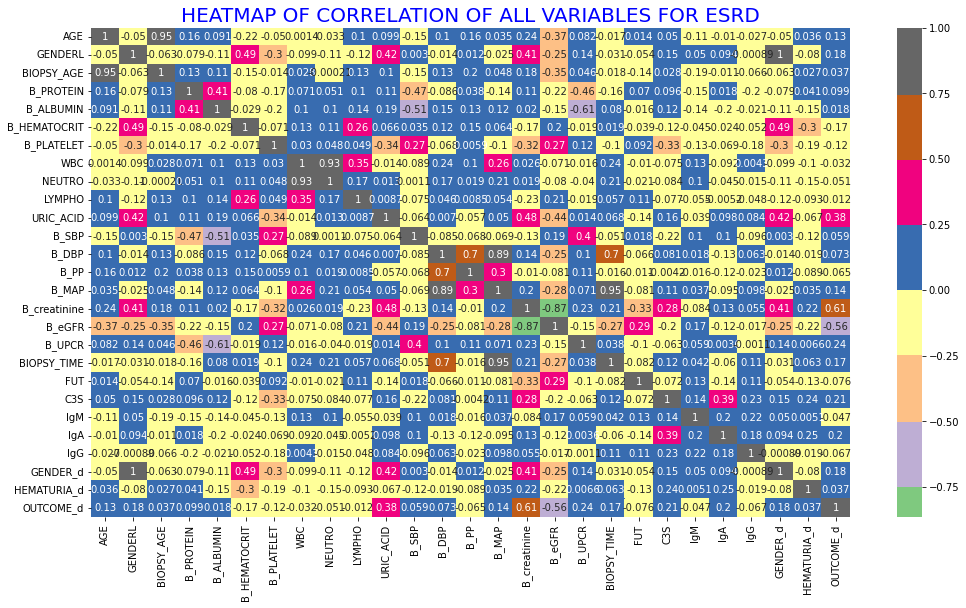

In [31]:
#plotting the correlation of all variables in esrd data
plt.figure(figsize = (17,9))
sns.heatmap(OUTCOME.corr(), annot = True, center = 0, cmap = 'Accent')
plt.title('HEATMAP OF CORRELATION OF ALL VARIABLES FOR ESRD', color='b', size=20.0)


THIS CORRELATION HEATMAP SHOWS THAT THERE IS A POSITIVE CORRELATION BETWEEN BASELINE CREATININE AND ESRD AND ALSO URIC ACID, THUS IT MEANS THAT THE HIGHER THE CREATININE AND URIC ACID, THE MORE LIKELY IT IS FOR ESRD WHILE THE HIGHER THE EGFR (NEGATIVE CORRELATION), THE LESS LIKELY FOR ONE TO DEVELOP ESRD. OTHER PARAMETERS OF NOTE HERE ARE C3STAIN, IgA AND UPCR WITH SLIGHT POSITIVE CORRELATION.

Text(0.5, 1.0, 'HEATMAP OF CORRELATION OF ALL VARIABLES FOR ESRD')

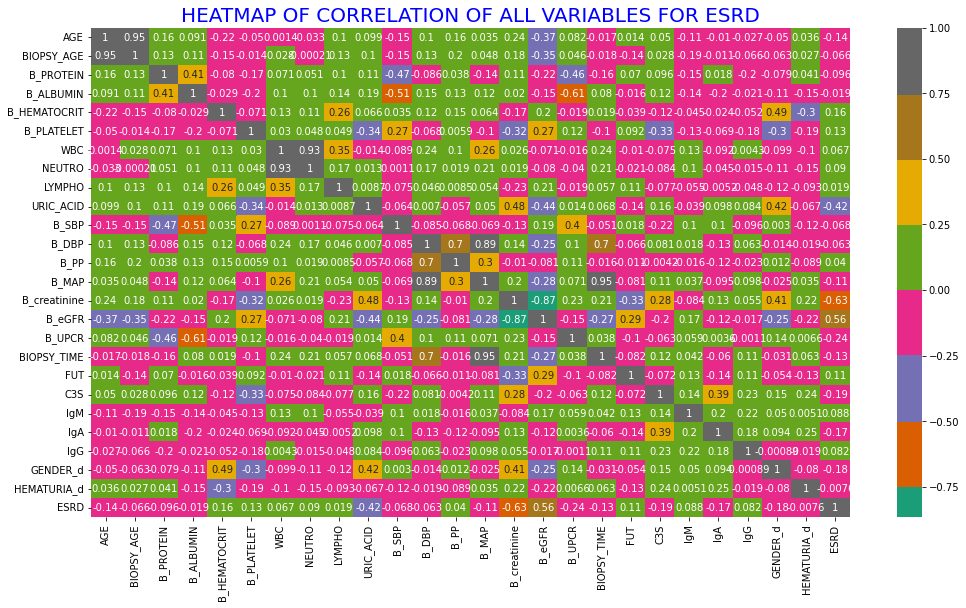

In [29]:
#plotting the correlation of all variables 
plt.figure(figsize = (17,9))
sns.heatmap(ESRD.corr(), annot = True, center = 0, cmap = 'Dark2')
plt.title('HEATMAP OF CORRELATION OF ALL VARIABLES FOR ESRD', color='b', size=20.0)


Text(0.5, 1.0, 'HEATMAP OF CORRELATION OF ALL VARIABLES FOR 50% PROGRESSION')

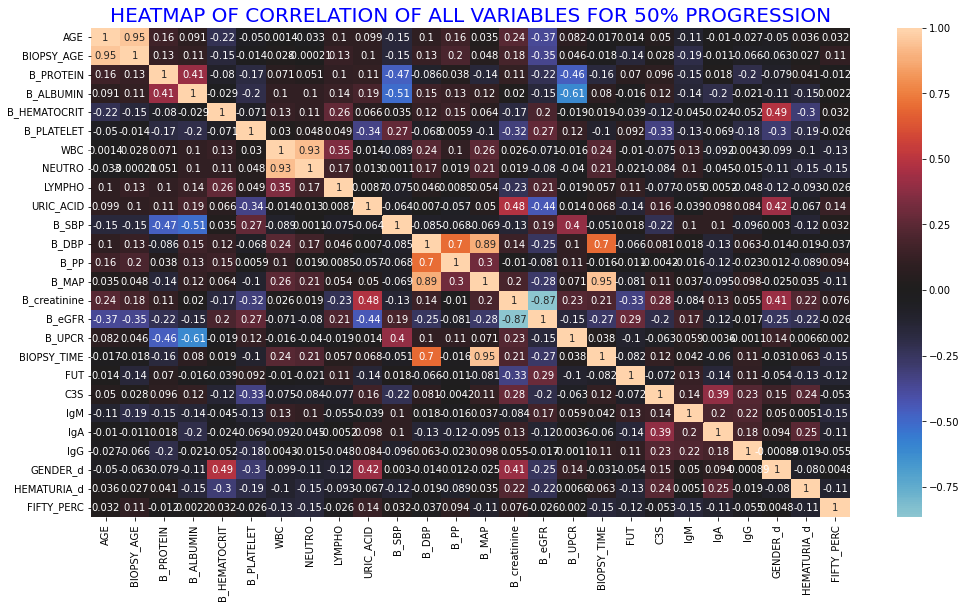

In [30]:
#plotting the correlation of all variables 
plt.figure(figsize = (17,9))
sns.heatmap(FIFTY_PERC.corr(), annot = True, center = 0)
plt.title('HEATMAP OF CORRELATION OF ALL VARIABLES FOR 50% PROGRESSION', color='b', size=20.0)

THIS HEATMAP SHOW EVEN A STRONGER CORRELATION BETWEEN URIC ACID & CREATININE TO PROGRESSION OF ESRD. THE HIGHER THE BOTH VALUES, THE MORE LIKELY WE HAVE AN ESRD


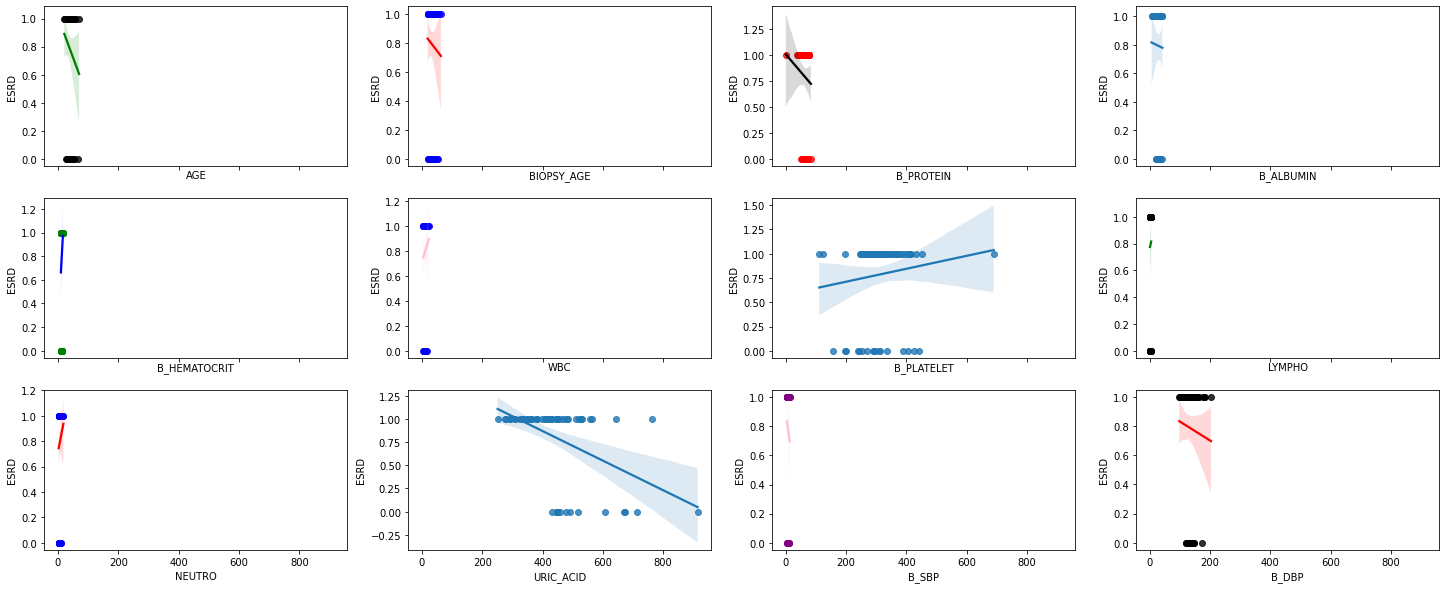

In [183]:
#This is  regression plot FOR ESRD PREDICTION
fig, axs = plt.subplots(ncols=4, nrows=3, figsize=(25,10), sharex=True)


sns.regplot(data = ESRD, x = 'AGE', y = 'ESRD', ax=axs[0,0],
           scatter_kws={"color": "black"}, line_kws={"color": "green"})
            
sns.regplot(data = ESRD, x = 'BIOPSY_AGE', y = 'ESRD', ax=axs[0,1],
           scatter_kws={"color": "blue"}, line_kws={"color": "red"})
sns.regplot(data = ESRD, x = 'B_PROTEIN', y = 'ESRD', ax=axs[0,2],
           scatter_kws={"color": "red"}, line_kws={"color": "black"})
sns.regplot(data = ESRD, x = 'B_ALBUMIN', y = 'ESRD', ax=axs[0,3])

sns.regplot(data = ESRD, x = 'B_HEMATOCRIT', y = 'ESRD',ax=axs[1,0],
           scatter_kws={"color": "green"}, line_kws={"color": "blue"})
sns.regplot(data = ESRD, x = 'B_PLATELET', y = 'ESRD', ax=axs[1,2])
sns.regplot(data = ESRD, x = 'WBC', y = 'ESRD', ax=axs[1,1],
           scatter_kws={"color": "blue"}, line_kws={"color": "pink"})
sns.regplot(data = ESRD, x = 'LYMPHO', y = 'ESRD', ax=axs[1,3],
           scatter_kws={"color": "black"}, line_kws={"color": "green"})
sns.regplot(data = ESRD, x = 'NEUTRO', y = 'ESRD', ax=axs[2,0],
           scatter_kws={"color": "blue"}, line_kws={"color": "red"})
sns.regplot(data = ESRD, x = 'URIC_ACID', y = 'ESRD', ax=axs[2,1])
sns.regplot(data = ESRD, x = 'B_SBP', y = 'ESRD', ax=axs[2,2],
           scatter_kws={"color": "purple"}, line_kws={"color": "pink"})
sns.regplot(data = ESRD, x = 'B_DBP', y = 'ESRD', ax=axs[2,3],
            scatter_kws={"color": "black"}, line_kws={"color": "red"})


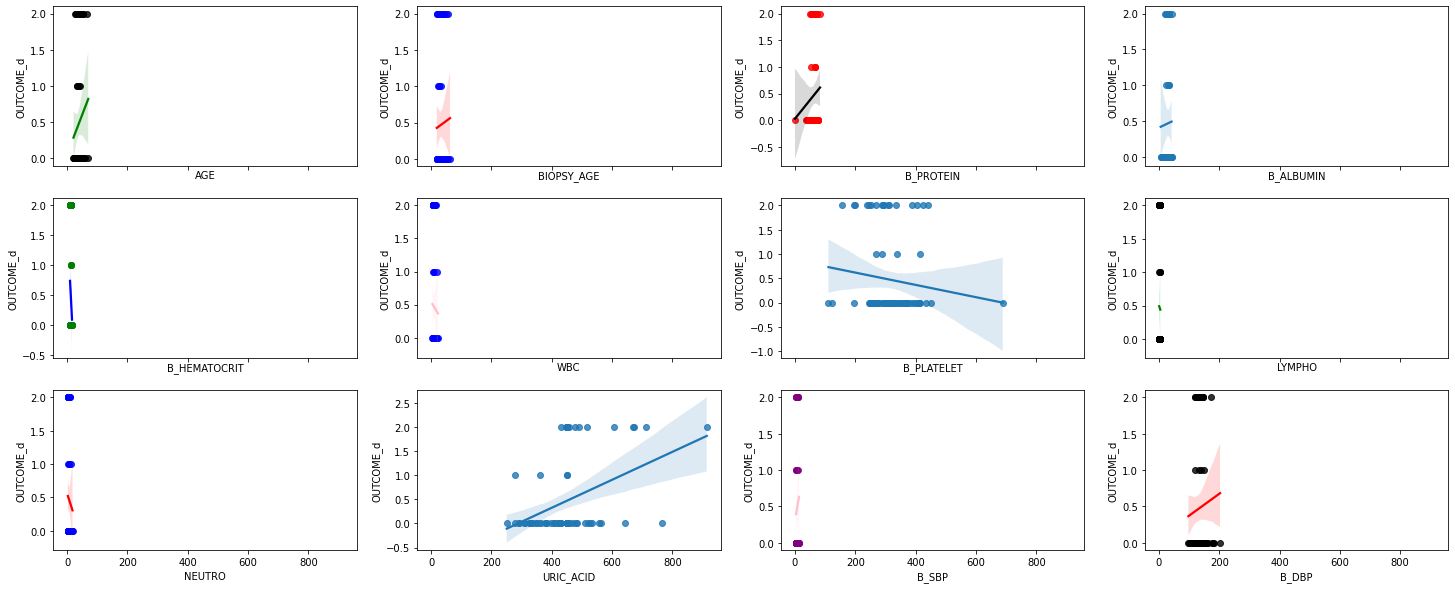

In [ ]:
#This is  regression plot FOR ESRD PREDICTION. IN THE OUTCOME, ESRD = 2, 50PERC = 1, NO PROGRESSION = 0
fig, axs = plt.subplots(ncols=4, nrows=3, figsize=(25,10), sharex=True)


sns.regplot(data = OUTCOME, x = 'AGE', y = 'OUTCOME_d', ax=axs[0,0],
           scatter_kws={"color": "black"}, line_kws={"color": "green"})
            
sns.regplot(data = OUTCOME, x = 'BIOPSY_AGE', y = 'OUTCOME_d', ax=axs[0,1],
           scatter_kws={"color": "blue"}, line_kws={"color": "red"})
sns.regplot(data = OUTCOME, x = 'B_PROTEIN', y = 'OUTCOME_d', ax=axs[0,2],
           scatter_kws={"color": "red"}, line_kws={"color": "black"})
sns.regplot(data = OUTCOME, x = 'B_ALBUMIN', y = 'OUTCOME_d', ax=axs[0,3])

sns.regplot(data = OUTCOME, x = 'B_HEMATOCRIT', y = 'OUTCOME_d',ax=axs[1,0],
           scatter_kws={"color": "green"}, line_kws={"color": "blue"})
sns.regplot(data = OUTCOME, x = 'B_PLATELET', y = 'OUTCOME_d', ax=axs[1,2])
sns.regplot(data = OUTCOME, x = 'WBC', y = 'OUTCOME_d', ax=axs[1,1],
           scatter_kws={"color": "blue"}, line_kws={"color": "pink"})
sns.regplot(data = OUTCOME, x = 'LYMPHO', y = 'OUTCOME_d', ax=axs[1,3],
            
           scatter_kws={"color": "black"}, line_kws={"color": "green"})
sns.regplot(data = OUTCOME, x = 'NEUTRO', y = 'OUTCOME_d', ax=axs[2,0],
           scatter_kws={"color": "blue"}, line_kws={"color": "red"})
sns.regplot(data = OUTCOME, x = 'URIC_ACID', y = 'OUTCOME_d', ax=axs[2,1])
sns.regplot(data = OUTCOME, x = 'B_SBP', y = 'OUTCOME_d', ax=axs[2,2],
           scatter_kws={"color": "purple"}, line_kws={"color": "pink"})
sns.regplot(data = OUTCOME, x = 'B_DBP', y = 'OUTCOME_d', ax=axs[2,3],
            scatter_kws={"color": "black"}, line_kws={"color": "red"})


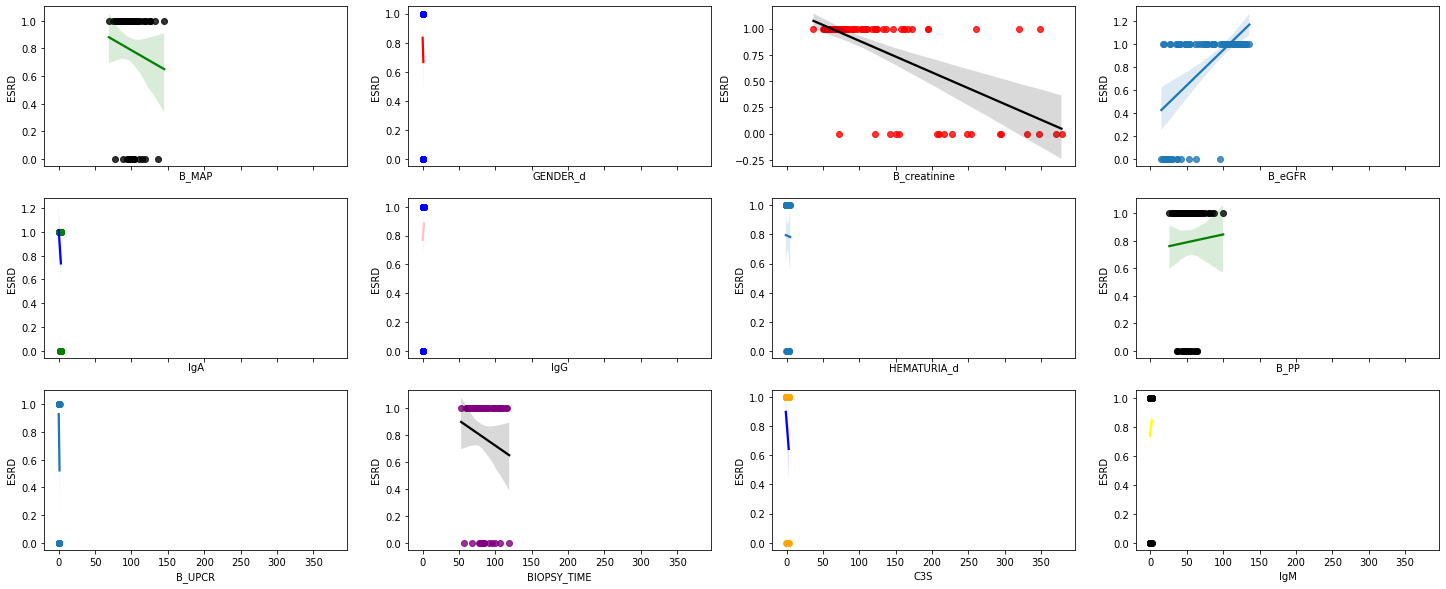

In [186]:
#This is  regression plot FOR ESRD PREDICTION
fig, axs = plt.subplots(ncols=4, nrows=3, figsize=(25,10), sharex=True)

sns.regplot(data = ESRD, x = 'B_MAP', y = 'ESRD', ax=axs[0,0],
           scatter_kws={"color": "black"}, line_kws={"color": "green"})
            
sns.regplot(data = ESRD, x = 'GENDER_d', y = 'ESRD', ax=axs[0,1],
           scatter_kws={"color": "blue"}, line_kws={"color": "red"})
sns.regplot(data = ESRD, x = 'B_creatinine', y = 'ESRD', ax=axs[0,2],
           scatter_kws={"color": "red"}, line_kws={"color": "black"})
sns.regplot(data = ESRD, x = 'B_eGFR', y = 'ESRD', ax=axs[0,3])

sns.regplot(data = ESRD, x = 'B_UPCR', y = 'ESRD', ax=axs[2,0])
sns.regplot(data = ESRD, x = 'BIOPSY_TIME', y = 'ESRD', ax=axs[2,1],
           scatter_kws={"color": "purple"}, line_kws={"color": "black"})
sns.regplot(data = ESRD, x = 'C3S', y = 'ESRD', ax=axs[2,2],
           scatter_kws={"color": "orange"}, line_kws={"color": "blue"})
sns.regplot(data = ESRD, x = 'IgM', y = 'ESRD', ax=axs[2,3],
           scatter_kws={"color": "black"}, line_kws={"color": "yellow"})

sns.regplot(data = ESRD, x = 'IgA', y = 'ESRD',ax=axs[1,0],
           scatter_kws={"color": "green"}, line_kws={"color": "blue"})
sns.regplot(data = ESRD, x = 'HEMATURIA_d', y = 'ESRD', ax=axs[1,2])
sns.regplot(data = ESRD, x = 'IgG', y = 'ESRD', ax=axs[1,1],
           scatter_kws={"color": "blue"}, line_kws={"color": "pink"})
sns.regplot(data = ESRD, x = 'B_PP', y = 'ESRD', ax=axs[1,3],
           scatter_kws={"color": "black"}, line_kws={"color": "green"})

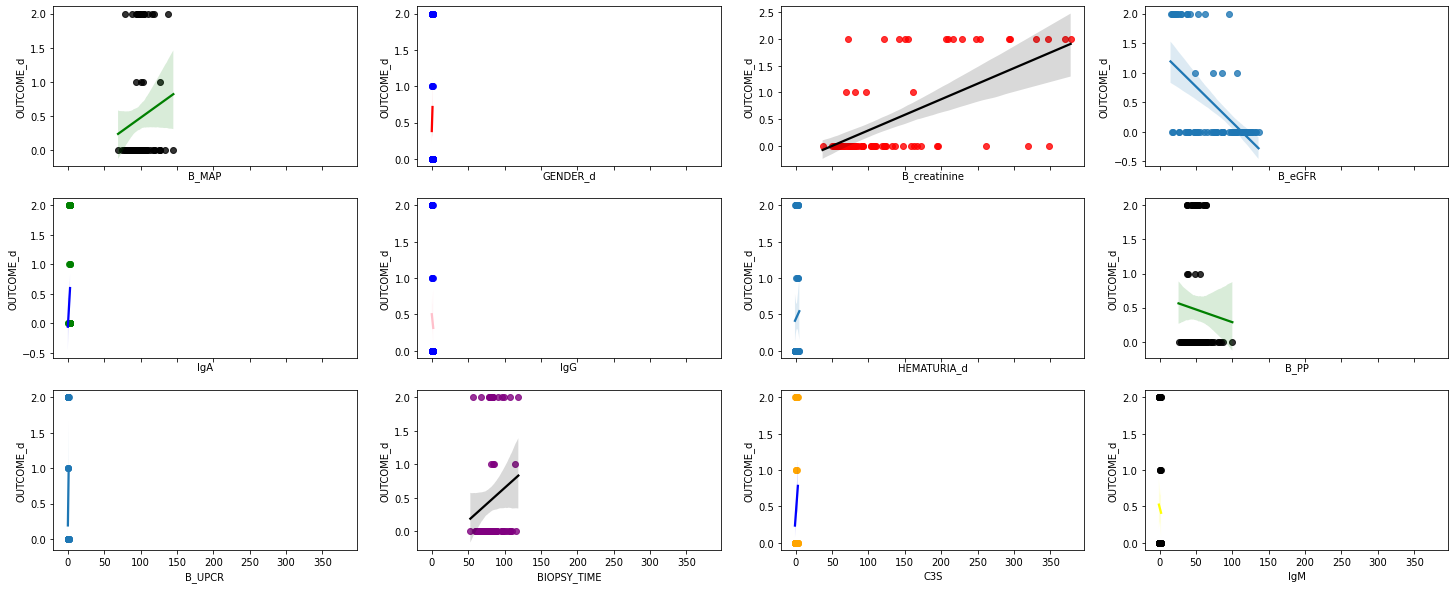

In [ ]:
#This is  regression plot FOR ESRD PREDICTION
fig, axs = plt.subplots(ncols=4, nrows=3, figsize=(25,10), sharex=True)

sns.regplot(data = OUTCOME, x = 'B_MAP', y = 'OUTCOME_d', ax=axs[0,0],
           scatter_kws={"color": "black"}, line_kws={"color": "green"})
            
sns.regplot(data = OUTCOME, x = 'GENDER_d', y = 'OUTCOME_d', ax=axs[0,1],
           scatter_kws={"color": "blue"}, line_kws={"color": "red"})
sns.regplot(data = OUTCOME, x = 'B_creatinine', y = 'OUTCOME_d', ax=axs[0,2],
           scatter_kws={"color": "red"}, line_kws={"color": "black"})
sns.regplot(data = OUTCOME, x = 'B_eGFR', y = 'OUTCOME_d', ax=axs[0,3])

sns.regplot(data = OUTCOME, x = 'B_UPCR', y = 'OUTCOME_d', ax=axs[2,0])
sns.regplot(data = OUTCOME, x = 'BIOPSY_TIME', y = 'OUTCOME_d', ax=axs[2,1],
           scatter_kws={"color": "purple"}, line_kws={"color": "black"})
sns.regplot(data = OUTCOME, x = 'C3S', y = 'OUTCOME_d', ax=axs[2,2],
           scatter_kws={"color": "orange"}, line_kws={"color": "blue"})
sns.regplot(data = OUTCOME, x = 'IgM', y = 'OUTCOME_d', ax=axs[2,3],
           scatter_kws={"color": "black"}, line_kws={"color": "yellow"})

sns.regplot(data = OUTCOME, x = 'IgA', y = 'OUTCOME_d',ax=axs[1,0],
           scatter_kws={"color": "green"}, line_kws={"color": "blue"})
sns.regplot(data = OUTCOME, x = 'HEMATURIA_d', y = 'OUTCOME_d', ax=axs[1,2])
sns.regplot(data = OUTCOME, x = 'IgG', y = 'OUTCOME_d', ax=axs[1,1],
           scatter_kws={"color": "blue"}, line_kws={"color": "pink"})
sns.regplot(data = OUTCOME, x = 'B_PP', y = 'OUTCOME_d', ax=axs[1,3],
           scatter_kws={"color": "black"}, line_kws={"color": "green"})

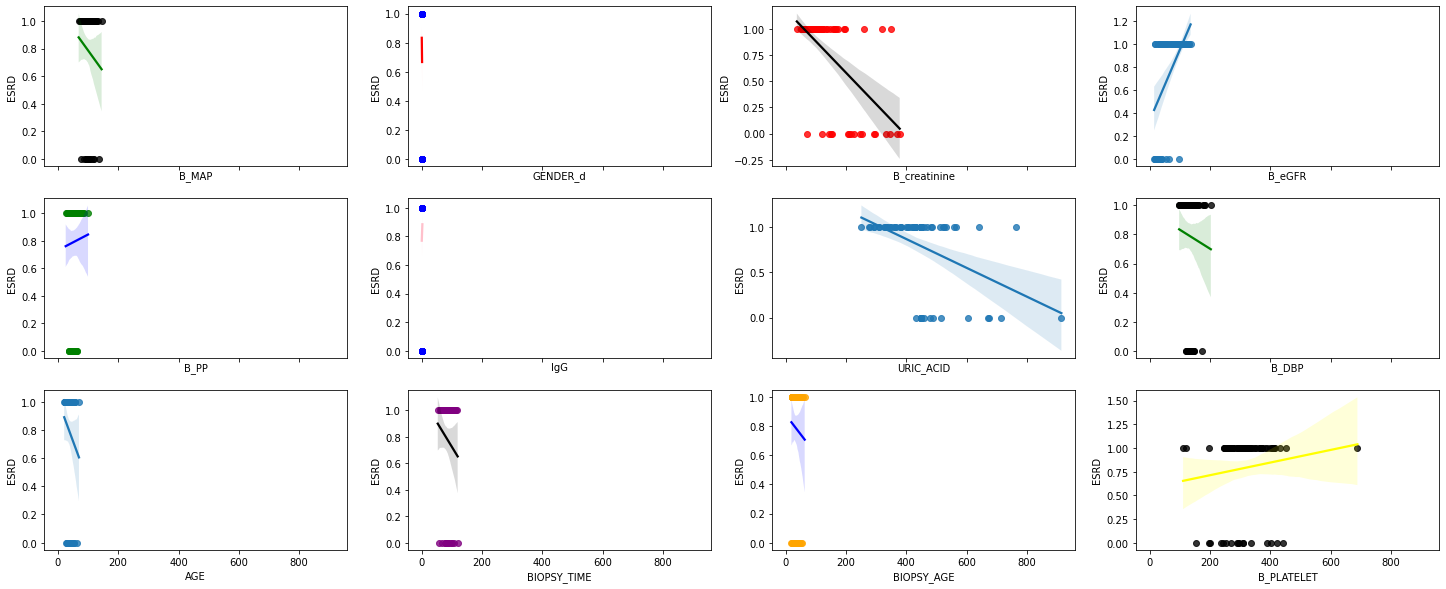

In [187]:
#This is  regression plot FOR ESRD PREDICTION
fig, axs = plt.subplots(ncols=4, nrows=3, figsize=(25,10), sharex=True)

sns.regplot(data = ESRD,  x = 'B_MAP', y = 'ESRD', ax=axs[0,0],
           scatter_kws={"color": "black"}, line_kws={"color": "green"})
            
sns.regplot(data = ESRD, x = 'GENDER_d', y = 'ESRD', ax=axs[0,1],
           scatter_kws={"color": "blue"}, line_kws={"color": "red"})
sns.regplot(data = ESRD, x = 'B_creatinine', y = 'ESRD', ax=axs[0,2],
           scatter_kws={"color": "red"}, line_kws={"color": "black"})
sns.regplot(data = ESRD, x = 'B_eGFR', y = 'ESRD', ax=axs[0,3])

sns.regplot(data = ESRD, x = 'AGE', y = 'ESRD', ax=axs[2,0])
sns.regplot(data = ESRD, x = 'BIOPSY_TIME', y = 'ESRD', ax=axs[2,1],
           scatter_kws={"color": "purple"}, line_kws={"color": "black"})
sns.regplot(data = ESRD, x = 'BIOPSY_AGE', y = 'ESRD', ax=axs[2,2],
           scatter_kws={"color": "orange"}, line_kws={"color": "blue"})
sns.regplot(data = ESRD, x = 'B_PLATELET', y = 'ESRD', ax=axs[2,3],
           scatter_kws={"color": "black"}, line_kws={"color": "yellow"})

sns.regplot(data = ESRD, x = 'B_PP', y = 'ESRD',ax=axs[1,0],
           scatter_kws={"color": "green"}, line_kws={"color": "blue"})
sns.regplot(data = ESRD, x = 'URIC_ACID', y = 'ESRD', ax=axs[1,2])
sns.regplot(data = ESRD, x = 'IgG', y = 'ESRD', ax=axs[1,1],
           scatter_kws={"color": "blue"}, line_kws={"color": "pink"})
sns.regplot(data = ESRD, x = 'B_DBP', y = 'ESRD', ax=axs[1,3],
           scatter_kws={"color": "black"}, line_kws={"color": "green"})

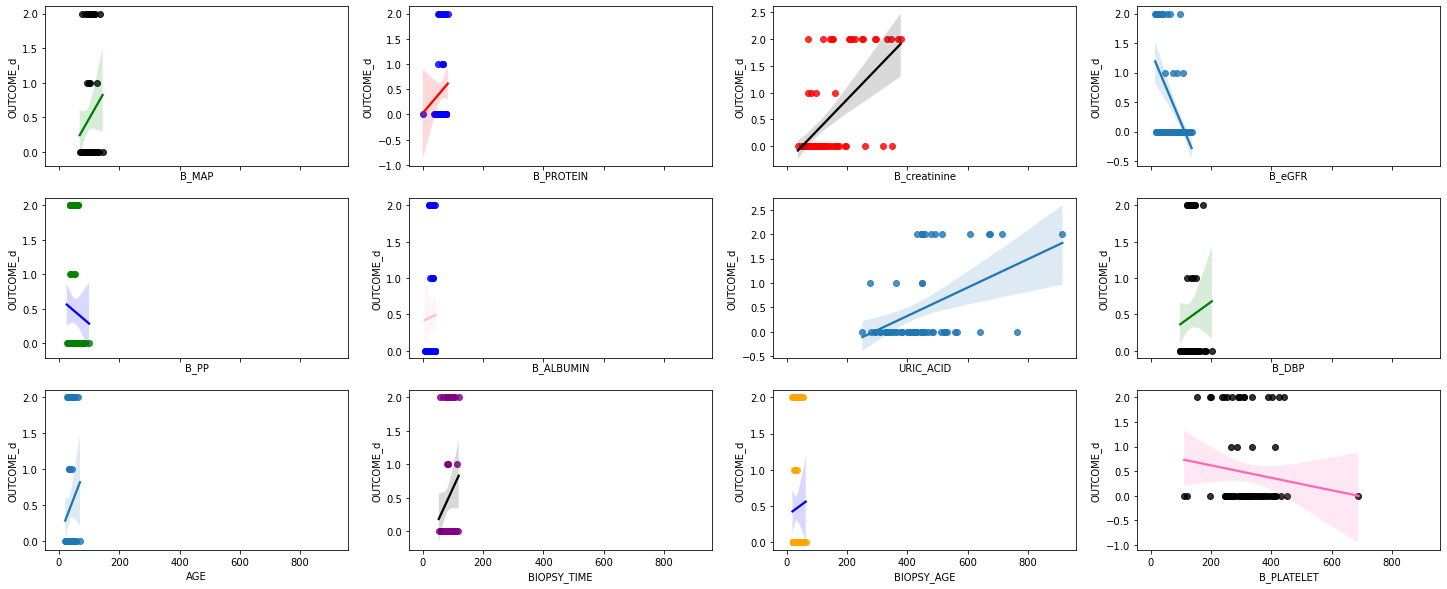

In [ ]:
#This is  regression plot FOR ESRD PREDICTION
fig, axs = plt.subplots(ncols=4, nrows=3, figsize=(25,10), sharex=True)

sns.regplot(data = OUTCOME,  x = 'B_MAP', y = 'OUTCOME_d', ax=axs[0,0],
           scatter_kws={"color": "black"}, line_kws={"color": "green"})     
sns.regplot(data = OUTCOME, x = 'B_PROTEIN', y = 'OUTCOME_d', ax=axs[0,1],
           scatter_kws={"color": "blue"}, line_kws={"color": "red"})
sns.regplot(data = OUTCOME, x = 'B_creatinine', y = 'OUTCOME_d', ax=axs[0,2],
           scatter_kws={"color": "red"}, line_kws={"color": "black"})
sns.regplot(data = OUTCOME, x = 'B_eGFR', y = 'OUTCOME_d', ax=axs[0,3])

sns.regplot(data = OUTCOME, x = 'AGE', y = 'OUTCOME_d', ax=axs[2,0])
sns.regplot(data = OUTCOME, x = 'BIOPSY_TIME', y = 'OUTCOME_d', ax=axs[2,1],
           scatter_kws={"color": "purple"}, line_kws={"color": "black"})
sns.regplot(data = OUTCOME, x = 'BIOPSY_AGE', y = 'OUTCOME_d', ax=axs[2,2],
           scatter_kws={"color": "orange"}, line_kws={"color": "blue"})
sns.regplot(data = OUTCOME, x = 'B_PLATELET', y = 'OUTCOME_d', ax=axs[2,3],
           scatter_kws={"color": "black"}, line_kws={"color": "hotpink"})

sns.regplot(data = OUTCOME, x = 'B_PP', y = 'OUTCOME_d',ax=axs[1,0],
           scatter_kws={"color": "green"}, line_kws={"color": "blue"})
sns.regplot(data = OUTCOME, x = 'URIC_ACID', y = 'OUTCOME_d', ax=axs[1,2])
sns.regplot(data = OUTCOME, x = 'B_ALBUMIN', y = 'OUTCOME_d', ax=axs[1,1],
           scatter_kws={"color": "blue"}, line_kws={"color": "pink"})
sns.regplot(data = OUTCOME, x = 'B_DBP', y = 'OUTCOME_d', ax=axs[1,3],
           scatter_kws={"color": "black"}, line_kws={"color": "green"})

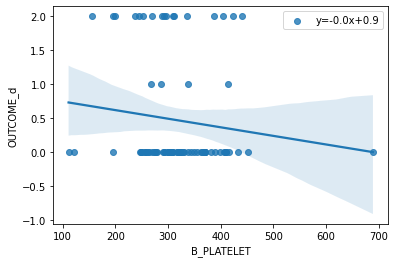

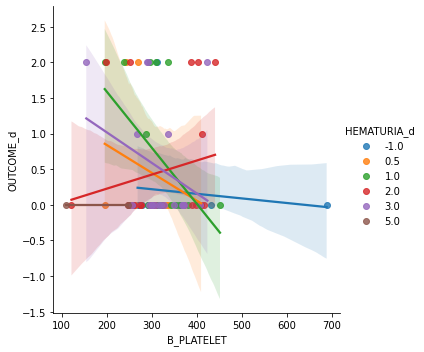

In [ ]:
slope, intercept, r_value, pv, se = stats.linregress(OUTCOME['B_PLATELET'],OUTCOME['OUTCOME_d'])
sns.regplot( x = 'B_PLATELET', y = 'OUTCOME_d', data = OUTCOME, ci= 95, label="y={0:.1f}x+{1:.1f}".format(slope, intercept)).legend(loc="best")
sns.lmplot(x = 'B_PLATELET', y = 'OUTCOME_d', data = OUTCOME, hue = 'HEMATURIA_d')

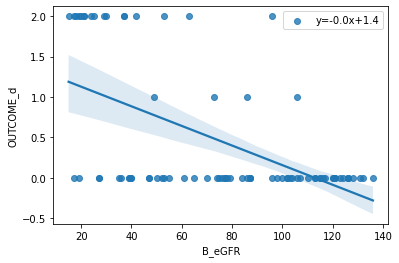

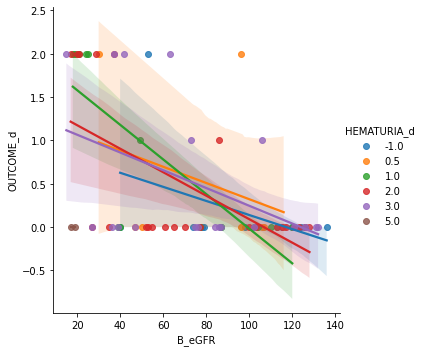

In [ ]:

slope, intercept, r_value, pv, se = stats.linregress(OUTCOME['B_eGFR'],OUTCOME['OUTCOME_d'])
sns.regplot( x = 'B_eGFR', y = 'OUTCOME_d', data = OUTCOME, label="y={0:.1f}x+{1:.1f}".format(slope, intercept)).legend(loc="best")
sns.lmplot(x = 'B_eGFR', y = 'OUTCOME_d', data = OUTCOME, hue = 'HEMATURIA_d')

THIS REGRESSION PLOT SHOWS THAT THE HIGHER THE eGFR, THE LESS LIKELY TO DEVELOP ESRD.

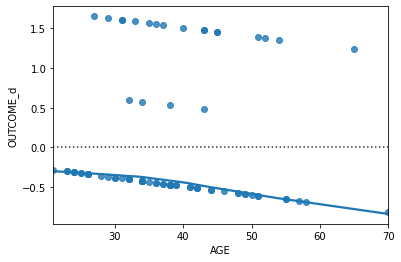

In [189]:

sns.residplot(data=OUTCOME, x='AGE', y='OUTCOME_d', x_partial=None, y_partial=None, lowess=True, order=0, robust=False, dropna=True, label=None, 
              color=None, scatter_kws=None, line_kws=None, ax=None)

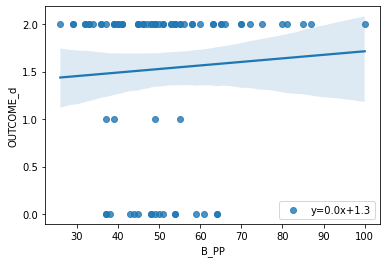

In [ ]:
slope, intercept, r_value, pv, se = stats.linregress(OUTCOME['B_PP'],OUTCOME['OUTCOME_d'])
sns.regplot( x = 'B_PP', y = 'OUTCOME_d', data = OUTCOME, ci=95, label="y={0:.1f}x+{1:.1f}".format(slope, intercept)).legend(loc="best")


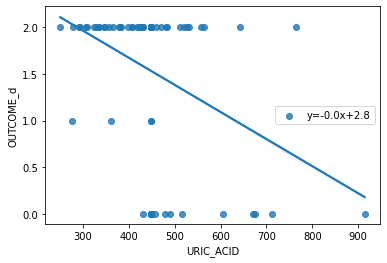

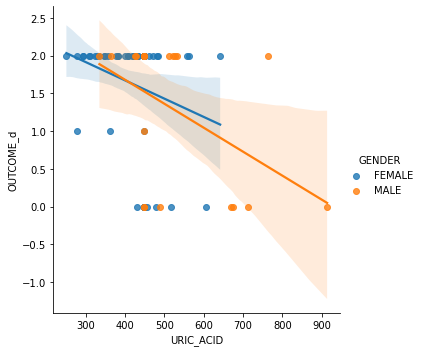

In [ ]:
slope, intercept, r_value, pv, se = stats.linregress(OUTCOME['URIC_ACID'],OUTCOME['OUTCOME_d'])
sns.regplot( x = 'URIC_ACID', y = 'OUTCOME_d', data = OUTCOME, ci= .95, label="y={0:.1f}x+{1:.1f}".format(slope, intercept)).legend(loc="best")
sns.lmplot(data = OUTCOME, x = 'URIC_ACID', y = 'OUTCOME_d', hue = 'GENDER')

<Figure size 720x432 with 0 Axes>

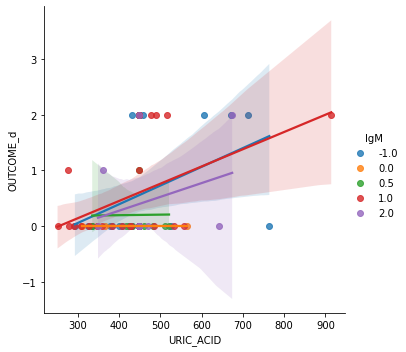

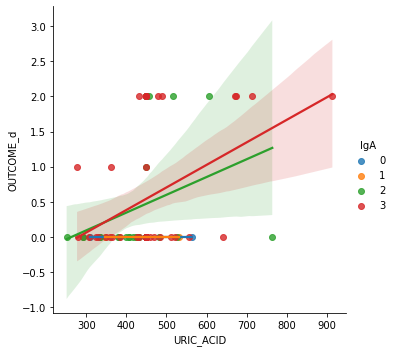

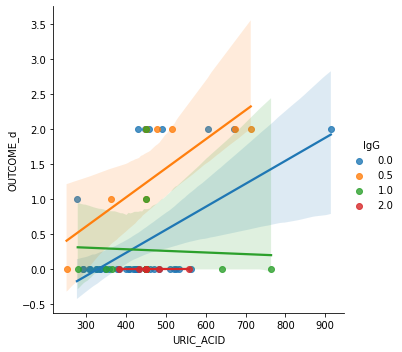

In [ ]:
plt.figure(figsize = (10,6))

sns.lmplot(data = OUTCOME, x = 'URIC_ACID', y = 'OUTCOME_d', hue = 'IgM')

sns.lmplot(data = OUTCOME, x = 'URIC_ACID', y = 'OUTCOME_d', hue = 'IgA')

sns.lmplot(data = OUTCOME, x = 'URIC_ACID', y = 'OUTCOME_d', hue = 'IgG')

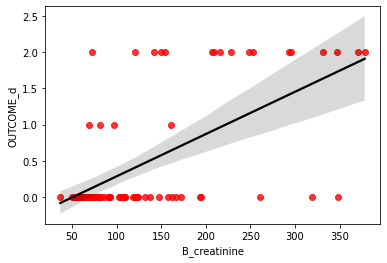

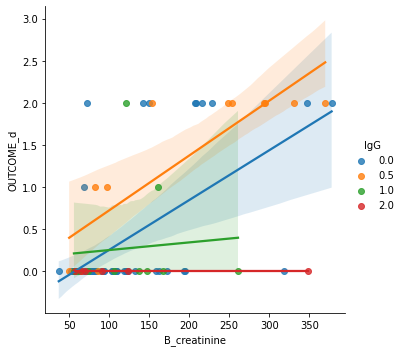

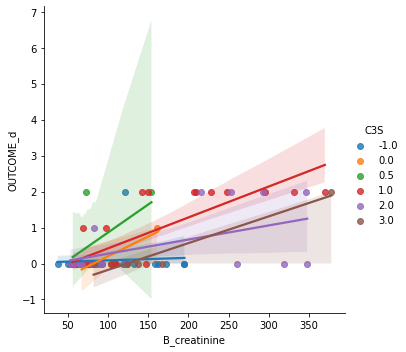

In [ ]:
sns.regplot(data = OUTCOME, x = 'B_creatinine', y = 'OUTCOME_d',
           scatter_kws={"color": "red"}, line_kws={"color": "black"})

sns.lmplot(data = OUTCOME, x = 'B_creatinine', y = 'OUTCOME_d', hue = 'IgG')

sns.lmplot(data = OUTCOME, x = 'B_creatinine', y = 'OUTCOME_d', hue = 'C3S' );

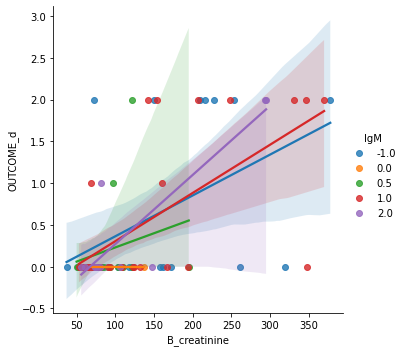

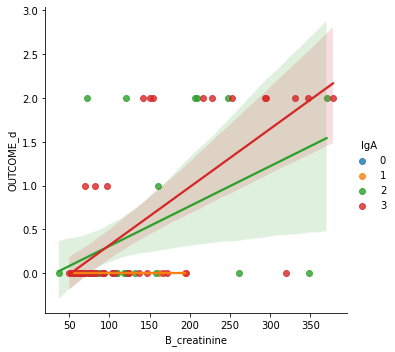

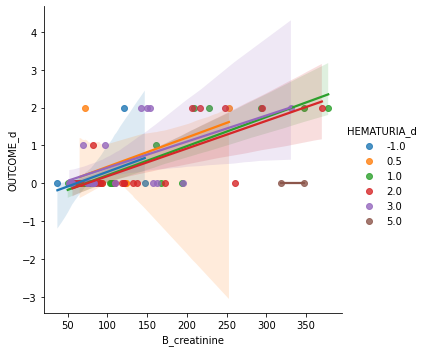

In [ ]:
sns.lmplot(data = OUTCOME, x = 'B_creatinine', y = 'OUTCOME_d', hue = 'IgM')

sns.lmplot(data = OUTCOME, x = 'B_creatinine', y = 'OUTCOME_d', hue = 'IgA')

sns.lmplot(data = OUTCOME, x = 'B_creatinine', y = 'OUTCOME_d', hue = 'HEMATURIA_d')


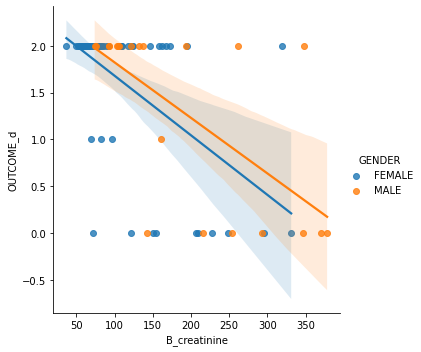

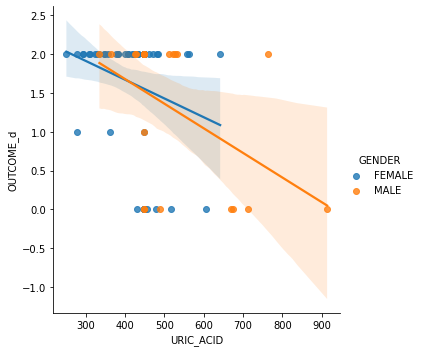

In [ ]:

sns.lmplot(data = OUTCOME, x = 'B_creatinine', y = 'OUTCOME_d', hue = 'GENDER')


sns.lmplot(data = OUTCOME, x = 'URIC_ACID', y = 'OUTCOME_d', hue = 'GENDER')

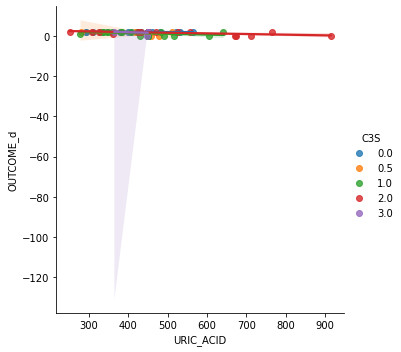

In [ ]:
sns.lmplot(data = OUTCOME, x = 'URIC_ACID', y = 'OUTCOME_d', hue = 'C3S')

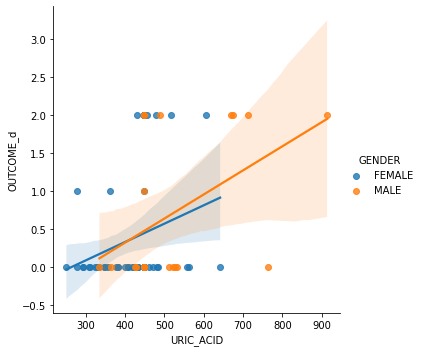

In [ ]:
sns.lmplot(data = OUTCOME, x = 'URIC_ACID', y = 'OUTCOME_d', hue = 'GENDER')

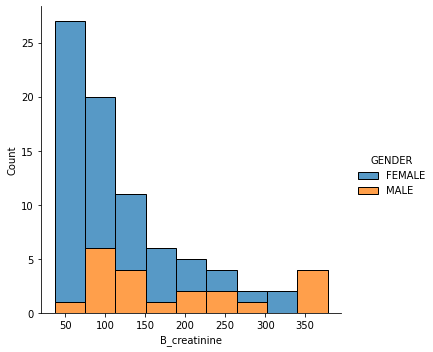

In [ ]:
sns.displot(OUTCOME, x="B_creatinine", hue="GENDER", multiple = "stack")

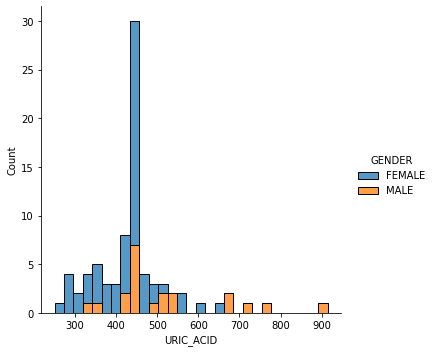

In [ ]:
sns.displot(OUTCOME, x="URIC_ACID", hue="GENDER", multiple = "stack")

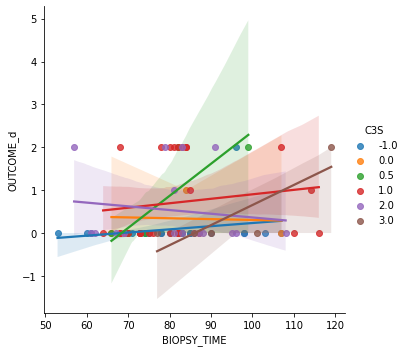

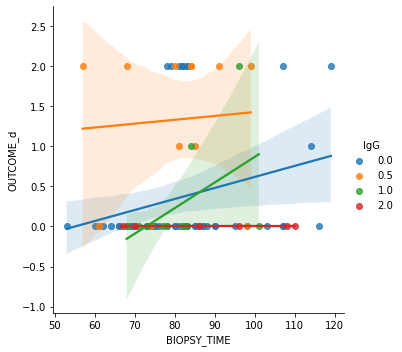

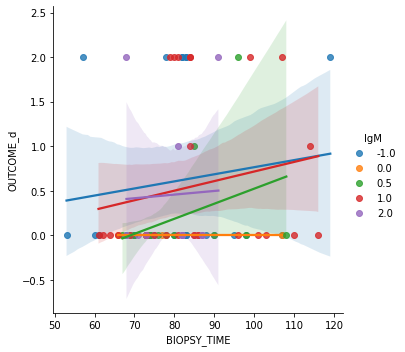

In [ ]:
sns.lmplot(data = OUTCOME, x = 'BIOPSY_TIME', y = 'OUTCOME_d', hue = 'C3S')

sns.lmplot(data = OUTCOME, x = 'BIOPSY_TIME', y = 'OUTCOME_d', hue = 'IgG')

sns.lmplot(data = OUTCOME, x = 'BIOPSY_TIME', y = 'OUTCOME_d', hue = 'IgM')

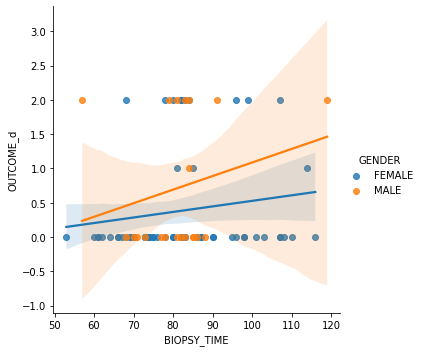

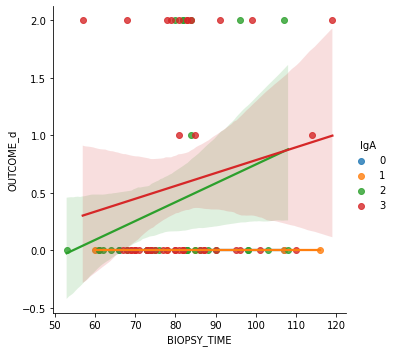

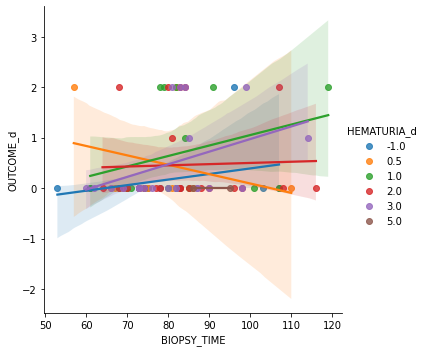

In [ ]:
sns.lmplot(data = OUTCOME, x = 'BIOPSY_TIME', y = 'OUTCOME_d', hue = 'GENDER')

sns.lmplot(data = OUTCOME, x = 'BIOPSY_TIME', y = 'OUTCOME_d', hue = 'IgA')

sns.lmplot(data = OUTCOME, x = 'BIOPSY_TIME', y = 'OUTCOME_d', hue = 'HEMATURIA_d')

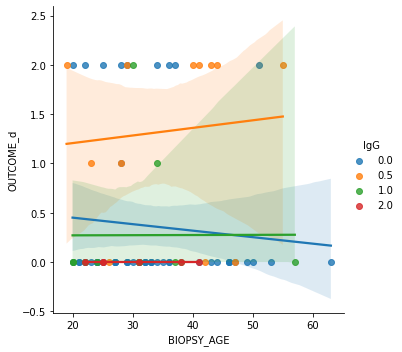

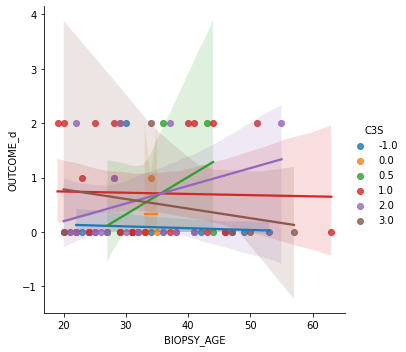

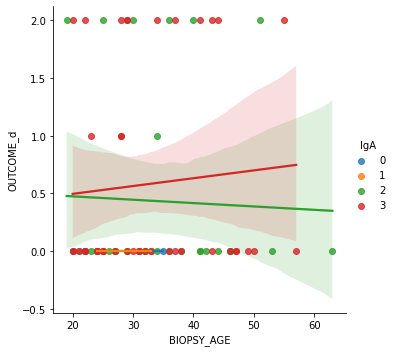

In [ ]:
sns.lmplot(data = OUTCOME, x = 'BIOPSY_AGE', y = 'OUTCOME_d', hue = 'IgG')

sns.lmplot(data = OUTCOME, x = 'BIOPSY_AGE', y = 'OUTCOME_d', hue = 'C3S')

sns.lmplot(data = OUTCOME, x = 'BIOPSY_AGE', y = 'OUTCOME_d', hue = 'IgA')


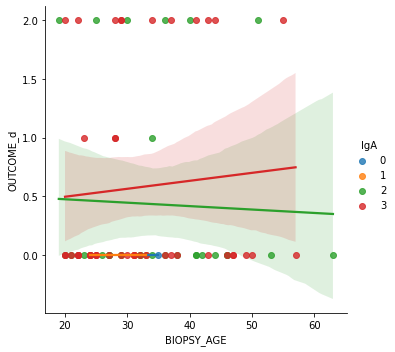

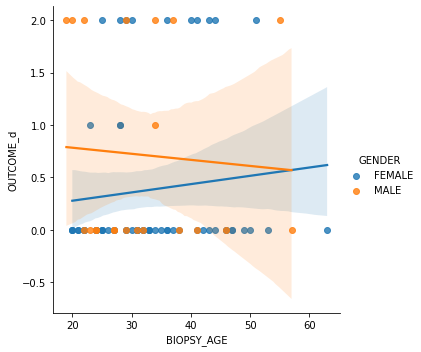

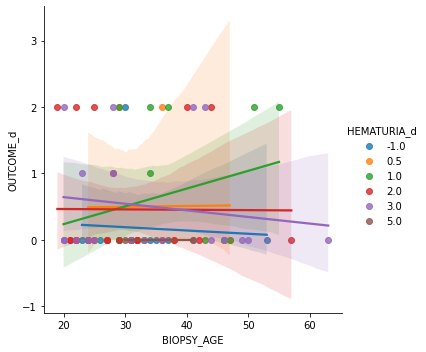

In [ ]:
sns.lmplot(data = OUTCOME, x = 'BIOPSY_AGE', y = 'OUTCOME_d', hue = 'IgA')

sns.lmplot(data = OUTCOME, x = 'BIOPSY_AGE', y = 'OUTCOME_d', hue = 'GENDER')

sns.lmplot(data = OUTCOME, x = 'BIOPSY_AGE', y = 'OUTCOME_d', hue = 'HEMATURIA_d')


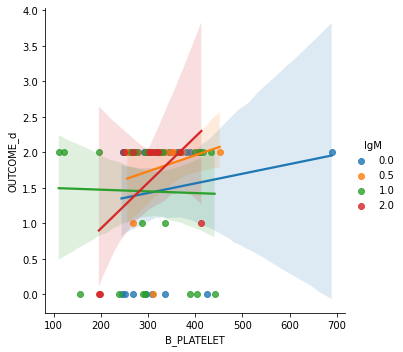

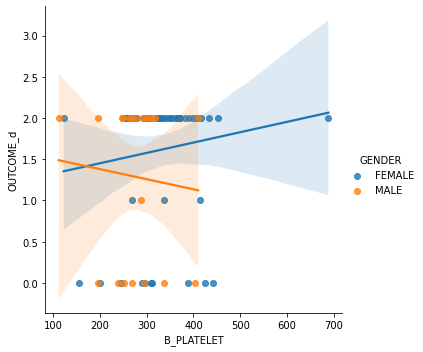

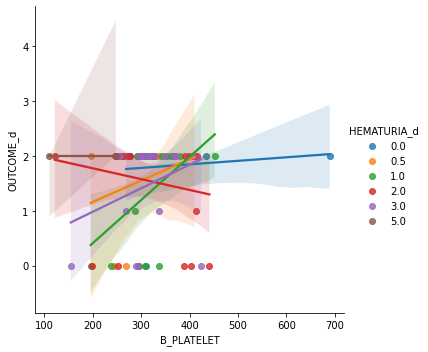

In [ ]:
sns.lmplot(data = OUTCOME, x = 'B_PLATELET', y = 'OUTCOME_d', hue = 'IgM')

sns.lmplot(data = OUTCOME, x = 'B_PLATELET', y = 'OUTCOME_d', hue = 'GENDER')

sns.lmplot(data = OUTCOME, x = 'B_PLATELET', y = 'OUTCOME_d', hue = 'HEMATURIA_d')


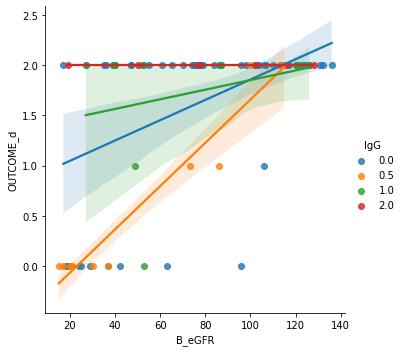

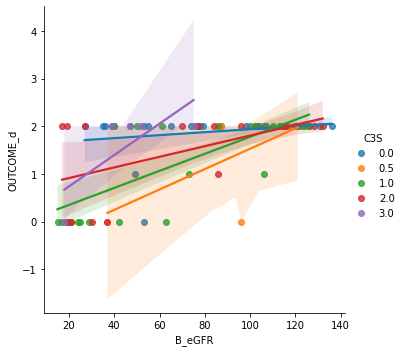

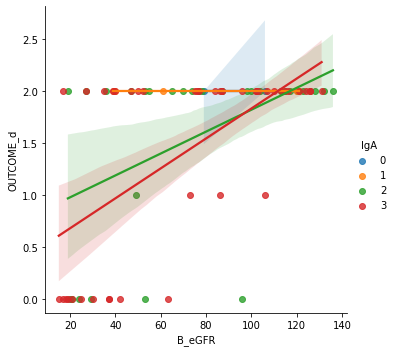

In [ ]:
sns.lmplot(data = OUTCOME, x = 'B_eGFR', y = 'OUTCOME_d', hue = 'IgG')

sns.lmplot(data = OUTCOME, x = 'B_eGFR', y = 'OUTCOME_d', hue = 'C3S')

sns.lmplot(data = OUTCOME, x = 'B_eGFR', y = 'OUTCOME_d', hue = 'IgA')


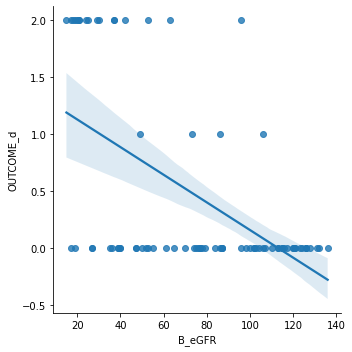

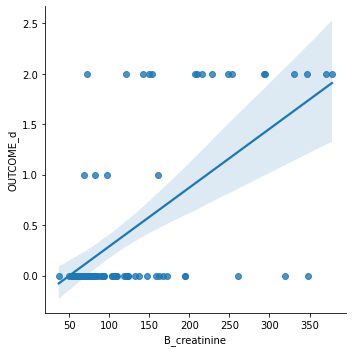

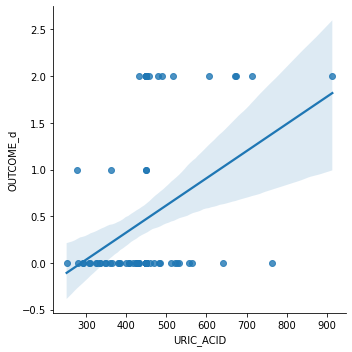

In [ ]:
sns.lmplot(data = OUTCOME, x = 'B_eGFR', y = 'OUTCOME_d')

sns.lmplot(data = OUTCOME, x = 'B_creatinine', y = 'OUTCOME_d')

sns.lmplot(data = OUTCOME, x = 'URIC_ACID', y = 'OUTCOME_d')


THIS REGRESSION PLOT SHOWS THAT THE HIGHER THE CREATININE, THE HIGHER THE RISK OF ESRD WHICH AGREES WITH OUR CORRELATION HEATMAP

Text(0, 0.5, 'OUTCOME')

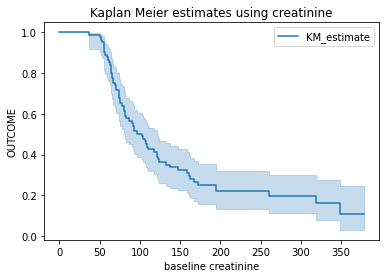

In [ ]:
kmf = KaplanMeierFitter()
X = ESRD['B_creatinine']
Y = ESRD['ESRD']
kmf.fit(X, event_observed = Y)
kmf.plot()
plt.title("Kaplan Meier estimates using creatinine")
plt.xlabel("baseline creatinine")
plt.ylabel("OUTCOME")

Text(0, 0.5, 'Survival')

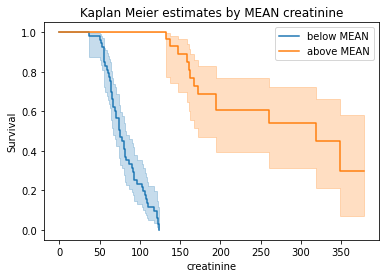

In [ ]:
kmf.survival_function_
biopsy = ESRD['B_creatinine'] < np.mean(ESRD['B_creatinine'])
ax = plt.subplot(111)
kmf.fit(X[biopsy], event_observed = Y[biopsy], label = 'below MEAN')
kmf.plot(ax = ax)
kmf.fit(X[~biopsy], event_observed = Y[~biopsy], label = 'above MEAN')
kmf.plot(ax = ax)
plt.title("Kaplan Meier estimates by MEAN creatinine")
plt.xlabel("creatinine")
plt.ylabel("Survival")

Text(0, 0.5, 'OUTCOME')

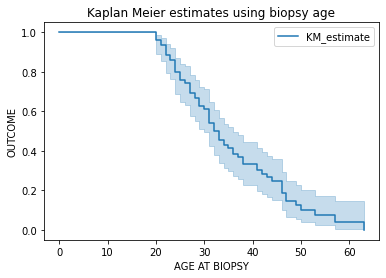

In [ ]:
kmf = KaplanMeierFitter()
X = ESRD['BIOPSY_AGE']
Y = ESRD['ESRD']
kmf.fit(X, event_observed = Y)
kmf.plot()
plt.title("Kaplan Meier estimates using biopsy age")
plt.xlabel("AGE AT BIOPSY")
plt.ylabel("OUTCOME")

Text(0, 0.5, 'Survival')

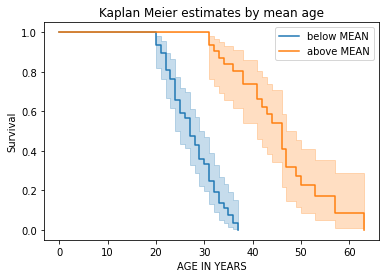

In [ ]:
kmf.survival_function_
age_group = OUTCOME['AGE'] < np.mean(OUTCOME['AGE'])
ax = plt.subplot(111)
kmf.fit(X[age_group], event_observed = Y[age_group], label = 'below MEAN')
kmf.plot(ax = ax)
kmf.fit(X[~age_group], event_observed = Y[~age_group], label = 'above MEAN')
kmf.plot(ax = ax)
plt.title("Kaplan Meier estimates by mean age")
plt.xlabel("AGE IN YEARS")
plt.ylabel("Survival")


Text(0, 0.5, 'Survival')

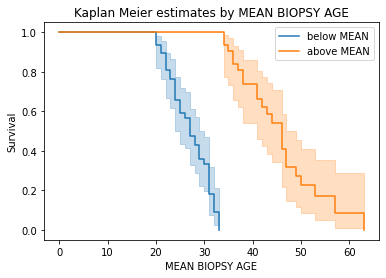

In [ ]:
kmf.survival_function_
biopsy = ESRD['BIOPSY_AGE'] < np.mean(ESRD['BIOPSY_AGE'])
ax = plt.subplot(111)
kmf.fit(X[biopsy], event_observed = Y[biopsy], label = 'below MEAN')
kmf.plot(ax = ax)
kmf.fit(X[~biopsy], event_observed = Y[~biopsy], label = 'above MEAN')
kmf.plot(ax = ax)
plt.title("Kaplan Meier estimates by MEAN BIOPSY AGE")
plt.xlabel("MEAN BIOPSY AGE")
plt.ylabel("Survival")

Text(0, 0.5, 'OUTCOME')

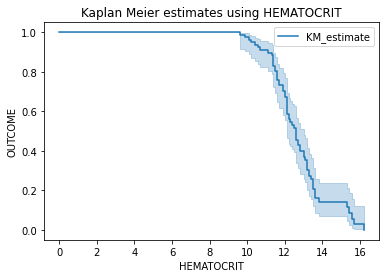

In [ ]:
kmf = KaplanMeierFitter()
X = ESRD['B_HEMATOCRIT']
Y = ESRD['ESRD']
kmf.fit(X, event_observed = Y)
kmf.plot()
plt.title("Kaplan Meier estimates using HEMATOCRIT")
plt.xlabel("HEMATOCRIT")
plt.ylabel("OUTCOME")

Text(0, 0.5, 'Survival')

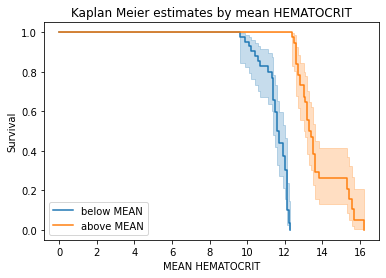

In [ ]:
kmf.survival_function_
biopsy = ESRD['B_HEMATOCRIT'] < np.mean(ESRD['B_HEMATOCRIT'])
ax = plt.subplot(111)
kmf.fit(X[biopsy], event_observed = Y[biopsy], label = 'below MEAN')
kmf.plot(ax = ax)
kmf.fit(X[~biopsy], event_observed = Y[~biopsy], label = 'above MEAN')
kmf.plot(ax = ax)
plt.title("Kaplan Meier estimates by mean HEMATOCRIT")
plt.xlabel("MEAN HEMATOCRIT")
plt.ylabel("Survival")

Text(0, 0.5, 'OUTCOME')

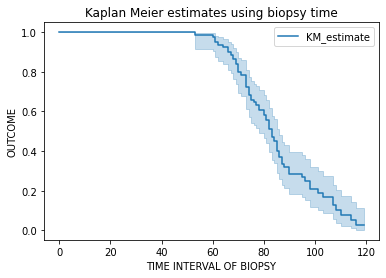

In [ ]:
kmf = KaplanMeierFitter()
X = ESRD['BIOPSY_TIME']
Y = ESRD['ESRD']
kmf.fit(X, event_observed = Y)
kmf.plot()
plt.title("Kaplan Meier estimates using biopsy time")
plt.xlabel("TIME INTERVAL OF BIOPSY")
plt.ylabel("OUTCOME")

Text(0, 0.5, 'Survival')

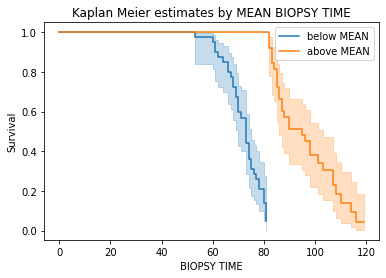

In [ ]:
kmf.survival_function_
biopsy = ESRD['BIOPSY_TIME'] < np.mean(ESRD['BIOPSY_TIME'])
ax = plt.subplot(111)
kmf.fit(X[biopsy], event_observed = Y[biopsy], label = 'below MEAN')
kmf.plot(ax = ax)
kmf.fit(X[~biopsy], event_observed = Y[~biopsy], label = 'above MEAN')
kmf.plot(ax = ax)
plt.title("Kaplan Meier estimates by MEAN BIOPSY TIME")
plt.xlabel("BIOPSY TIME")
plt.ylabel("Survival")

HERE, CREATININE VALUE GREATER THAN 50 HAS AN INCREASED RISK FOR ESRD DEVELOPMENT. AT 200 WITH 20% CAHNCE WHILE VALUES GREATER THAN 350 IS ASSOCIATED WITH HIGHER RISK

Text(0, 0.5, 'OUTCOME')

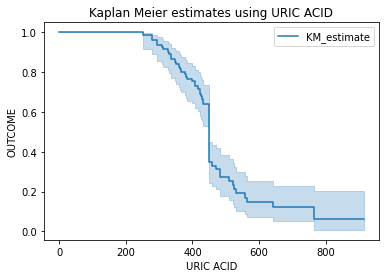

In [ ]:
kmf = KaplanMeierFitter()
X = ESRD['URIC_ACID']
Y = ESRD['ESRD']
kmf.fit(X, event_observed = Y)
kmf.plot()
plt.title("Kaplan Meier estimates using URIC ACID")
plt.xlabel("URIC ACID")
plt.ylabel("OUTCOME")

Text(0, 0.5, 'Survival')

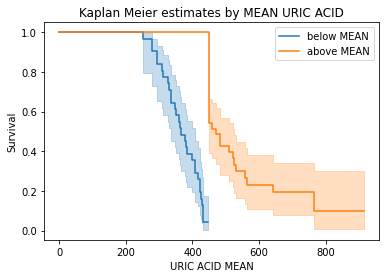

In [ ]:
kmf.survival_function_
biopsy = ESRD['URIC_ACID'] < np.mean(ESRD['URIC_ACID'])
ax = plt.subplot(111)
kmf.fit(X[biopsy], event_observed = Y[biopsy], label = 'below MEAN')
kmf.plot(ax = ax)
kmf.fit(X[~biopsy], event_observed = Y[~biopsy], label = 'above MEAN')
kmf.plot(ax = ax)
plt.title("Kaplan Meier estimates by MEAN URIC ACID")
plt.xlabel("URIC ACID MEAN")
plt.ylabel("Survival")

Text(0, 0.5, 'OUTCOME')

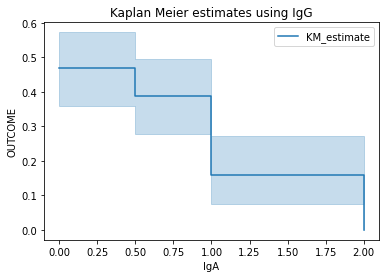

In [ ]:
kmf = KaplanMeierFitter()
X = ESRD['IgG']
Y = ESRD['ESRD']
kmf.fit(X, event_observed = Y)
kmf.plot()
plt.title("Kaplan Meier estimates using IgG")
plt.xlabel("IgA")
plt.ylabel("OUTCOME")

Text(0, 0.5, 'OUTCOME')

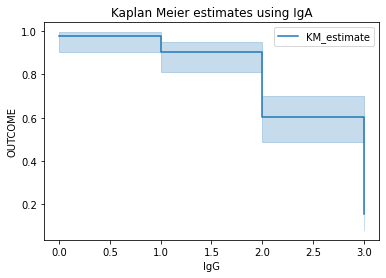

In [ ]:
kmf = KaplanMeierFitter()
X = ESRD['IgA']
Y = ESRD['ESRD']
kmf.fit(X, event_observed = Y)
kmf.plot()
plt.title("Kaplan Meier estimates using IgA")
plt.xlabel("IgG")
plt.ylabel("OUTCOME")

Text(0, 0.5, 'OUTCOME')

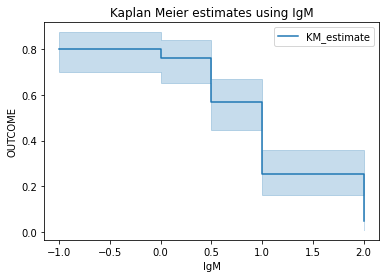

In [ ]:
kmf = KaplanMeierFitter()
X = ESRD['IgM']
Y = ESRD['ESRD']
kmf.fit(X, event_observed = Y)
kmf.plot()
plt.title("Kaplan Meier estimates using IgM")
plt.xlabel("IgM")
plt.ylabel("OUTCOME")

Text(0, 0.5, 'OUTCOME')

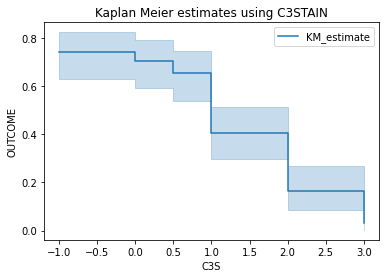

In [ ]:
kmf = KaplanMeierFitter()
X = ESRD['C3S']
Y = ESRD['ESRD']
kmf.fit(X, event_observed = Y)
kmf.plot()
plt.title("Kaplan Meier estimates using C3STAIN")
plt.xlabel("C3S")
plt.ylabel("OUTCOME")

Text(0, 0.5, 'OUTCOME')

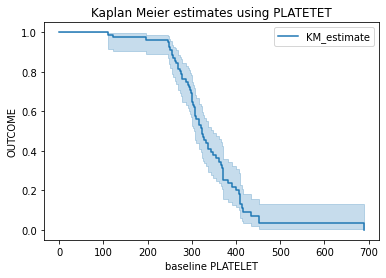

In [ ]:
kmf = KaplanMeierFitter()
X = ESRD['B_PLATELET']
Y = ESRD['ESRD']
kmf.fit(X, event_observed = Y)
kmf.plot()
plt.title("Kaplan Meier estimates using PLATETET")
plt.xlabel("baseline PLATELET")
plt.ylabel("OUTCOME")

THIS SHOWS THAT PLATELET < 300 HAVE A HIGHER CHANCE OF SURVIVAL BUT GREATER THAN 300 THE PERCANTAGE FOR SURVIVAL DROPPED DRASTICALLY

Text(0, 0.5, 'Survival')

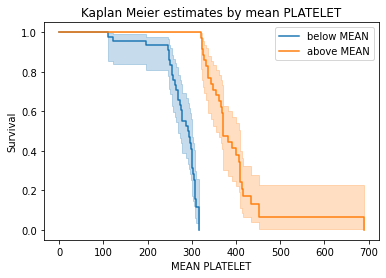

In [ ]:
kmf.survival_function_
biopsy = ESRD['B_PLATELET'] < np.mean(ESRD['B_PLATELET'])
ax = plt.subplot(111)
kmf.fit(X[biopsy], event_observed = Y[biopsy], label = 'below MEAN')
kmf.plot(ax = ax)
kmf.fit(X[~biopsy], event_observed = Y[~biopsy], label = 'above MEAN')
kmf.plot(ax = ax)
plt.title("Kaplan Meier estimates by mean PLATELET")
plt.xlabel("MEAN PLATELET")
plt.ylabel("Survival")

Text(0, 0.5, 'OUTCOME')

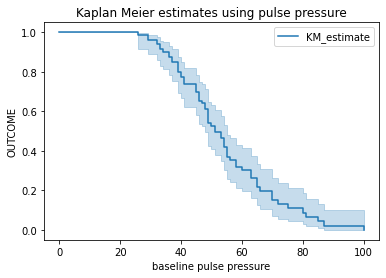

In [ ]:
kmf = KaplanMeierFitter()
X = ESRD['B_PP']
Y = ESRD['ESRD']
kmf.fit(X, event_observed = Y)
kmf.plot()
plt.title("Kaplan Meier estimates using pulse pressure")
plt.xlabel("baseline pulse pressure")
plt.ylabel("OUTCOME")

PULSE PRESSURE LESS THAN 30 HAVE A HIGHER CHANCE OF SURVIVAL BUT GREATER THAN 30 THE CHANCES OF SURVIVAL DECLINES TILL ABOUT 90 WHERE SURVIVAL PERCANTAGE IS SHOWN TO BE ABOUT 0%

Text(0, 0.5, 'Survival')

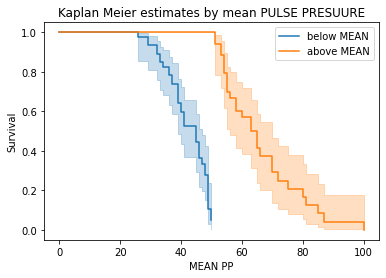

In [ ]:
kmf.survival_function_
biopsy = ESRD['B_PP'] < np.mean(ESRD['B_PP'])
ax = plt.subplot(111)
kmf.fit(X[biopsy], event_observed = Y[biopsy], label = 'below MEAN')
kmf.plot(ax = ax)
kmf.fit(X[~biopsy], event_observed = Y[~biopsy], label = 'above MEAN')
kmf.plot(ax = ax)
plt.title("Kaplan Meier estimates by mean PULSE PRESUURE")
plt.xlabel("MEAN PP")
plt.ylabel("Survival")

Text(0, 0.5, 'OUTCOME')

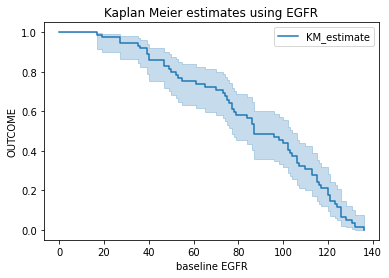

In [ ]:
kmf = KaplanMeierFitter()
X = ESRD['B_eGFR']
Y = ESRD['ESRD']
kmf.fit(X, event_observed = Y)
kmf.plot()
plt.title("Kaplan Meier estimates using EGFR")
plt.xlabel("baseline EGFR")
plt.ylabel("OUTCOME")

EGFR AT 80 HAS ABOUT 60% CHANCE OF SURVIVAL

HIGHER CHANCE OF SURVIVAL IN PERSONS ABOVE MEAN AGE (38.19 YEARS) THAN THOSE BELOW MEAN AGE.

VALUES OF CREATININE ABOVE MEAN VALUE OF (130.93) HAD A SLIGHTLY BETTER CHANCE OF SURVIVAL THAN THOSE BELOW THE MEAN VALUE

MEAN HERE IS 317.2 AND THERE NO MARKED DIFFERECNCE BETWEEN THE SURVIVAL OF THOSE ABOVE MEAN VALUE AND THOSE BELOW MEAN VALUE

Text(0, 0.5, 'Survival')

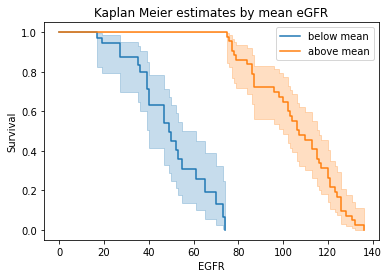

In [ ]:
kmf.survival_function_
biopsy = ESRD['B_eGFR'] < np.mean(ESRD['B_eGFR'])
ax = plt.subplot(111)
kmf.fit(X[biopsy], event_observed = Y[biopsy], label = 'below mean')
kmf.plot(ax = ax)
kmf.fit(X[~biopsy], event_observed = Y[~biopsy], label = 'above mean')
kmf.plot(ax = ax)
plt.title("Kaplan Meier estimates by mean eGFR")
plt.xlabel("EGFR")
plt.ylabel("Survival")

HERE SHOWS THAT THOSE WHO HAD BELOW MEAN VALUE OF 74.30 EGFR HAD A SIGNIFICANT BETTER SURVIVAL CHANCE THAN THOSE ABOVE THE MEAN VALUE

Text(0, 0.5, 'OUTCOME')

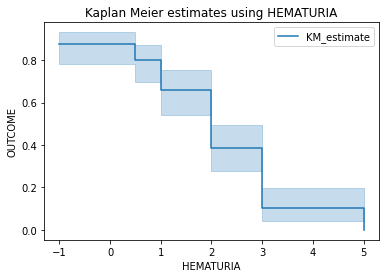

In [ ]:
kmf = KaplanMeierFitter()
X = ESRD['HEMATURIA_d']
Y = ESRD['ESRD']
kmf.fit(X, event_observed = Y)
kmf.plot()
plt.title("Kaplan Meier estimates using HEMATURIA")
plt.xlabel("HEMATURIA")
plt.ylabel("OUTCOME")

Text(0, 0.5, 'Survival')

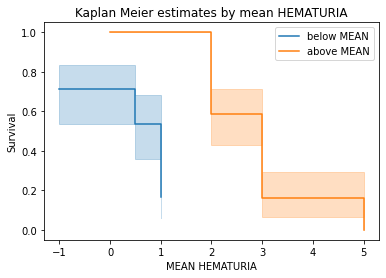

In [ ]:
kmf.survival_function_
biopsy = ESRD['HEMATURIA_d'] < np.mean(ESRD['HEMATURIA_d'])
ax = plt.subplot(111)
kmf.fit(X[biopsy], event_observed = Y[biopsy], label = 'below MEAN')
kmf.plot(ax = ax)
kmf.fit(X[~biopsy], event_observed = Y[~biopsy], label = 'above MEAN')
kmf.plot(ax = ax)
plt.title("Kaplan Meier estimates by mean HEMATURIA")
plt.xlabel("MEAN HEMATURIA")
plt.ylabel("Survival")

BELOW AND ABOVE MEAN VALUE FOR HEMATURIA SHOWED NO SIGNIFICANT SURVIVAL DIFFERENCE

HEMATOCRIT BELOW 12.23 SHOWED A SLIGHLTY BETTER CHANCE OF SURVIVAL THAN ABOVE THE MEAN VALUE

Text(0.5, 1.0, 'Survival Function based on CREATININE')

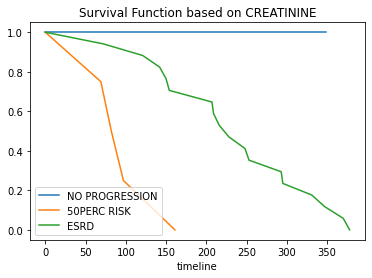

In [ ]:

# Define the low and high satisfaction
High = (df1.OUTCOME_d == 2) 

Med  = (df1.OUTCOME_d == 1)
 
Low = (df1.OUTCOME_d == 0) 
 
# Plot the survival function
ax = plt.subplot()
 
kmf = KaplanMeierFitter()
kmf.fit(durations=df1[Low].B_creatinine,
event_observed=df1[Low].OUTCOME_d, label='NO PROGRESSION')
kmf.survival_function_.plot(ax=ax)

kmf.fit(durations=df1[Med].B_creatinine, event_observed=df1[Med].OUTCOME_d, label='50PERC RISK')
kmf.survival_function_.plot(ax=ax)
 
kmf.fit(durations=df1[High].B_creatinine, event_observed=df1[High].OUTCOME_d, label='ESRD')
kmf.survival_function_.plot(ax=ax)
 
plt.title('Survival Function based on CREATININE')

HERE, THERE IS A HIGHER CHANCE OF COMING DOWN WITH 50 PERCENT PROGRESSION THAN DEVELOPING THE FULL ESRD. WHILE 50 PERCENT PROGRESSION SHOWS VALUE AT 150 TO BE ABOUT 8% SURVIVAL, THE ESRD AT SAME VALUE OF 150 SHOWS ABOUT 75% SURVIVAL.





Text(0.5, 1.0, 'Survival Function based on eGFR')

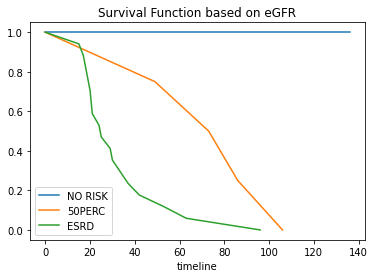

In [ ]:
# Define the low and high satisfaction
High = (df1.OUTCOME_d == 2) 

Med  = (df1.OUTCOME_d == 1)
 
Low = (df1.OUTCOME_d == 0) 
 
# Plot the survival function
ax = plt.subplot()

kmf = KaplanMeierFitter()
kmf.fit(durations=df1[Low].B_eGFR,
event_observed=df1[Low].OUTCOME_d, label='NO RISK')
kmf.survival_function_.plot(ax=ax)

kmf.fit(durations=df1[Med].B_eGFR, event_observed=df1[Med].OUTCOME_d, label='50PERC')
kmf.survival_function_.plot(ax=ax)
 
kmf.fit(durations=df1[High].B_eGFR, event_observed=df1[High].OUTCOME_d, label='ESRD')
kmf.survival_function_.plot(ax=ax)
 
plt.title('Survival Function based on eGFR')

WITH EGFR AT 40, THERE IS 20% CHANCE OF ESRD SURVIVAL WHILE 50 PERCENT PROGRESSION AT SAME VALUE OF 40 IS ABOUT 4 TIMES OF ESRD SURVIVAL AT 80%. THUS, ITS LONGER THAN 4 TIMES OF 50 PERCENT DISEASE PROGRESSION TO MANIFEST AS FULL DISEASE ENTITY.

Text(0.5, 1.0, 'Survival Function based on age')

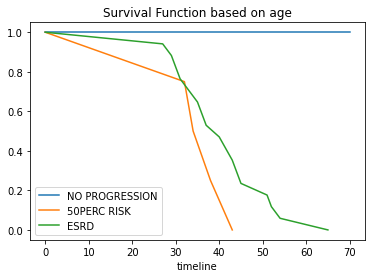

In [ ]:
# Define the low and high satisfaction
High = (df1.OUTCOME_d == 2) 

Med  = (df1.OUTCOME_d == 1)
 
Low = (df1.OUTCOME_d == 0) 
 
# Plot the survival function
ax = plt.subplot()
 
kmf = KaplanMeierFitter()
kmf.fit(durations=df1[Low].AGE,
event_observed=df1[Low].OUTCOME_d, label='NO PROGRESSION')
kmf.survival_function_.plot(ax=ax)

kmf.fit(durations=df1[Med].AGE, event_observed=df1[Med].OUTCOME_d, label='50PERC RISK')
kmf.survival_function_.plot(ax=ax)
 
kmf.fit(durations=df1[High].AGE, event_observed=df1[High].OUTCOME_d, label='ESRD')
kmf.survival_function_.plot(ax=ax)
 
plt.title('Survival Function based on age')

AT ABOUT 34 YEARS OF AGE, THE SURVIVAL OF ESRD & 50 PERCENT PROGRESSION SEEM TO BE THE SAME AT ABOUT 70%.

Text(0.5, 1.0, 'Survival Function based on PLATELET')

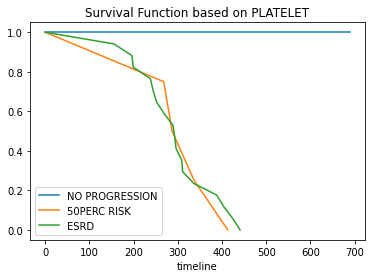

In [ ]:
# Define the low and high satisfaction
High = (df1.OUTCOME_d == 2) 

Med  = (df1.OUTCOME_d == 1)
 
Low = (df1.OUTCOME_d == 0) 
 
# Plot the survival function
ax = plt.subplot()
 
kmf = KaplanMeierFitter()
kmf.fit(durations=df1[Low].B_PLATELET,
event_observed=df1[Low].OUTCOME_d, label='NO PROGRESSION')
kmf.survival_function_.plot(ax=ax)

kmf.fit(durations=df1[Med].B_PLATELET, event_observed=df1[Med].OUTCOME_d, label='50PERC RISK')
kmf.survival_function_.plot(ax=ax)
 
kmf.fit(durations=df1[High].B_PLATELET, event_observed=df1[High].OUTCOME_d, label='ESRD')
kmf.survival_function_.plot(ax=ax)
 
plt.title('Survival Function based on PLATELET')

HERE, 50 PERCENT PROGRESSION AND ESRD SHOW ALMOST SAME CHANCE OF SURVIVAL AND BEYOND PLATELET OF 420, THE CHNACE OF SURVIVAL IS ESTIMATED TO BE ZERO

Text(0.5, 1.0, 'Survival Function based on HEMATOCRIT')

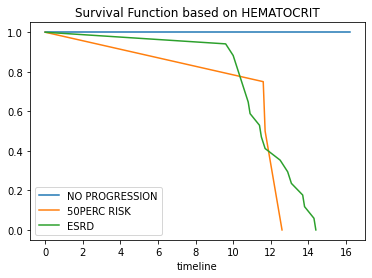

In [ ]:

# Define the low and high satisfaction
High = (df1.OUTCOME_d == 2) 

Med  = (df1.OUTCOME_d == 1)
 
Low = (df1.OUTCOME_d == 0) 
 
# Plot the survival function
ax = plt.subplot()
 
kmf = KaplanMeierFitter()
kmf.fit(durations=df1[Low].B_HEMATOCRIT,
event_observed=df1[Low].OUTCOME_d, label='NO PROGRESSION')
kmf.survival_function_.plot(ax=ax)

kmf.fit(durations=df1[Med].B_HEMATOCRIT, event_observed=df1[Med].OUTCOME_d, label='50PERC RISK')
kmf.survival_function_.plot(ax=ax)
 
kmf.fit(durations=df1[High].B_HEMATOCRIT, event_observed=df1[High].OUTCOME_d, label='ESRD')
kmf.survival_function_.plot(ax=ax)
 
plt.title('Survival Function based on HEMATOCRIT')

WITH HEMATOCRIT OF 4.2, THERE IS 90% SURVIVAL FOR THOSE WHO HAD 50 PERCENT DISEASE PROGRESSION WHILE WHILE HEMATOCRIT FOR SAME SURVIVAL RATE IS ABOUT 11 FOR ESRD

Text(0.5, 1.0, 'Survival Function based on HEMATURIA')

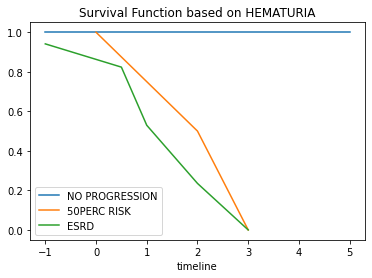

In [ ]:

# Define the low and high satisfaction
High = (df1.OUTCOME_d == 2) 

Med  = (df1.OUTCOME_d == 1)
 
Low = (df1.OUTCOME_d == 0) 
 
# Plot the survival function
ax = plt.subplot()
 
kmf = KaplanMeierFitter()
kmf.fit(durations=df1[Low].HEMATURIA_d,
event_observed=df1[Low].OUTCOME_d, label='NO PROGRESSION')
kmf.survival_function_.plot(ax=ax)

kmf.fit(durations=df1[Med].HEMATURIA_d, event_observed=df1[Med].OUTCOME_d, label='50PERC RISK')
kmf.survival_function_.plot(ax=ax)
 
kmf.fit(durations=df1[High].HEMATURIA_d, event_observed=df1[High].OUTCOME_d, label='ESRD')
kmf.survival_function_.plot(ax=ax)
 
plt.title('Survival Function based on HEMATURIA')

THERE IS A HIGHER CHANCE OF ESRD WITH HEMATURIA AT ANY VALUE THAN GHAVING 50 PERCENT OF PROGRESSION WHILE AT HEMATURIA OF 3+++ OR MORE, THERE IS NO EVIDENCE OF SURVIVAL FOR BOTH GROUPS EXCEPT THOSE WHO DID NOT PROGRESS.

Text(0.5, 1.0, 'Survival Function based on URIC ACID')

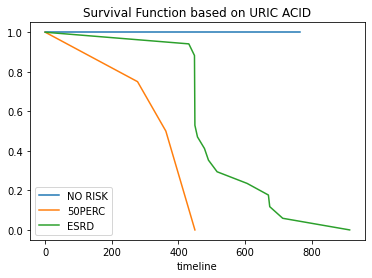

In [ ]:
# Define the low and high satisfaction
High = (df1.OUTCOME_d == 2) 

Med  = (df1.OUTCOME_d == 1)
 
Low = (df1.OUTCOME_d == 0) 
 
# Plot the survival function
ax = plt.subplot()

kmf = KaplanMeierFitter()
kmf.fit(durations=df1[Low].URIC_ACID,
event_observed=df1[Low].OUTCOME_d, label='NO RISK')
kmf.survival_function_.plot(ax=ax)

kmf.fit(durations=df1[Med].URIC_ACID, event_observed=df1[Med].OUTCOME_d, label='50PERC')
kmf.survival_function_.plot(ax=ax)
 
kmf.fit(durations=df1[High].URIC_ACID, event_observed=df1[High].OUTCOME_d, label='ESRD')
kmf.survival_function_.plot(ax=ax)
 
plt.title('Survival Function based on URIC ACID')

Text(0.5, 1.0, 'Survival Function based on AGE AT BIOPSY')

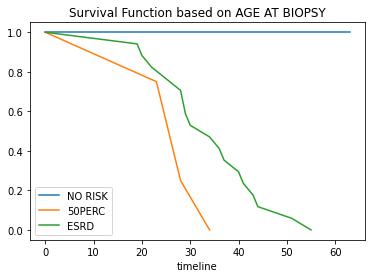

In [ ]:
# Define the low and high satisfaction
High = (df1.OUTCOME_d == 2) 

Med  = (df1.OUTCOME_d == 1)
 
Low = (df1.OUTCOME_d == 0) 
 
# Plot the survival function
ax = plt.subplot()

kmf = KaplanMeierFitter()
kmf.fit(durations=df1[Low].BIOPSY_AGE,
event_observed=df1[Low].OUTCOME_d, label='NO RISK')
kmf.survival_function_.plot(ax=ax)

kmf.fit(durations=df1[Med].BIOPSY_AGE, event_observed=df1[Med].OUTCOME_d, label='50PERC')
kmf.survival_function_.plot(ax=ax)
 
kmf.fit(durations=df1[High].BIOPSY_AGE, event_observed=df1[High].OUTCOME_d, label='ESRD')
kmf.survival_function_.plot(ax=ax)
 
plt.title('Survival Function based on AGE AT BIOPSY')

Text(0.5, 1.0, 'Survival Function based on BIOPSY TIME')

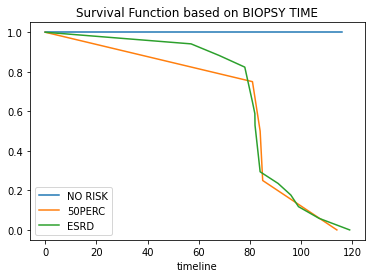

In [ ]:
# Define the low and high satisfaction
High = (df1.OUTCOME_d == 2) 

Med  = (df1.OUTCOME_d == 1)
 
Low = (df1.OUTCOME_d == 0) 
 
# Plot the survival function
ax = plt.subplot()

kmf = KaplanMeierFitter()
kmf.fit(durations=df1[Low].BIOPSY_TIME,
event_observed=df1[Low].OUTCOME_d, label='NO RISK')
kmf.survival_function_.plot(ax=ax)

kmf.fit(durations=df1[Med].BIOPSY_TIME, event_observed=df1[Med].OUTCOME_d, label='50PERC')
kmf.survival_function_.plot(ax=ax)
 
kmf.fit(durations=df1[High].BIOPSY_TIME, event_observed=df1[High].OUTCOME_d, label='ESRD')
kmf.survival_function_.plot(ax=ax)
 
plt.title('Survival Function based on BIOPSY TIME')

Text(0.5, 1.0, 'Survival Function based on IgG')

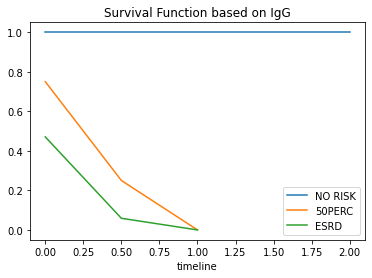

In [ ]:
# Define the low and high satisfaction
High = (df1.OUTCOME_d == 2) 

Med  = (df1.OUTCOME_d == 1)
 
Low = (df1.OUTCOME_d == 0) 
 
# Plot the survival function
ax = plt.subplot()

kmf = KaplanMeierFitter()
kmf.fit(durations=df1[Low].IgG,
event_observed=df1[Low].OUTCOME_d, label='NO RISK')
kmf.survival_function_.plot(ax=ax)

kmf.fit(durations=df1[Med].IgG, event_observed=df1[Med].OUTCOME_d, label='50PERC')
kmf.survival_function_.plot(ax=ax)
 
kmf.fit(durations=df1[High].IgG, event_observed=df1[High].OUTCOME_d, label='ESRD')
kmf.survival_function_.plot(ax=ax)
 
plt.title('Survival Function based on IgG')

Text(0.5, 1.0, 'Survival Function based on IgA')

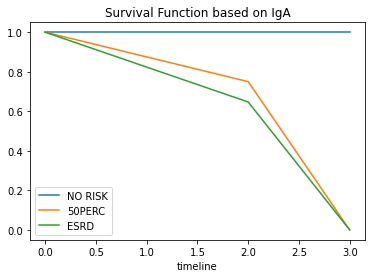

In [ ]:
# Define the low and high satisfaction
High = (df1.OUTCOME_d == 2) 

Med  = (df1.OUTCOME_d == 1)
 
Low = (df1.OUTCOME_d == 0) 
 
# Plot the survival function
ax = plt.subplot()

kmf = KaplanMeierFitter()
kmf.fit(durations=df1[Low].IgA,
event_observed=df1[Low].OUTCOME_d, label='NO RISK')
kmf.survival_function_.plot(ax=ax)

kmf.fit(durations=df1[Med].IgA, event_observed=df1[Med].OUTCOME_d, label='50PERC')
kmf.survival_function_.plot(ax=ax)
 
kmf.fit(durations=df1[High].IgA, event_observed=df1[High].OUTCOME_d, label='ESRD')
kmf.survival_function_.plot(ax=ax)
 
plt.title('Survival Function based on IgA')

Text(0.5, 1.0, 'Survival Function based on IgM')

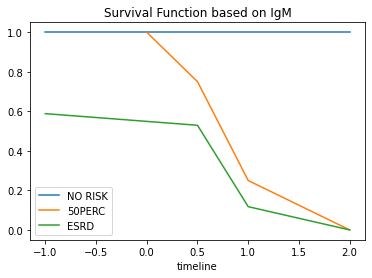

In [ ]:
# Define the low and high satisfaction
High = (df1.OUTCOME_d == 2) 

Med  = (df1.OUTCOME_d == 1)
 
Low = (df1.OUTCOME_d == 0) 
 
# Plot the survival function
ax = plt.subplot()

kmf = KaplanMeierFitter()
kmf.fit(durations=df1[Low].IgM,
event_observed=df1[Low].OUTCOME_d, label='NO RISK')
kmf.survival_function_.plot(ax=ax)

kmf.fit(durations=df1[Med].IgM, event_observed=df1[Med].OUTCOME_d, label='50PERC')
kmf.survival_function_.plot(ax=ax)
 
kmf.fit(durations=df1[High].IgM, event_observed=df1[High].OUTCOME_d, label='ESRD')
kmf.survival_function_.plot(ax=ax)
 
plt.title('Survival Function based on IgM')

Text(0.5, 1.0, 'Survival Function based on C3STAIN')

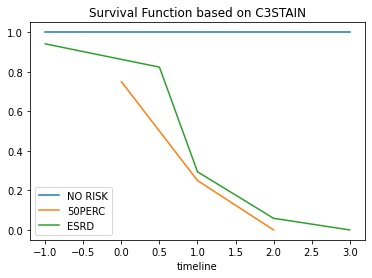

In [ ]:
# Define the low and high satisfaction
High = (df1.OUTCOME_d == 2) 

Med  = (df1.OUTCOME_d == 1)
 
Low = (df1.OUTCOME_d == 0) 
 
# Plot the survival function
ax = plt.subplot()

kmf = KaplanMeierFitter()
kmf.fit(durations=df1[Low].C3S,
event_observed=df1[Low].OUTCOME_d, label='NO RISK')
kmf.survival_function_.plot(ax=ax)

kmf.fit(durations=df1[Med].C3S, event_observed=df1[Med].OUTCOME_d, label='50PERC')
kmf.survival_function_.plot(ax=ax)
 
kmf.fit(durations=df1[High].C3S, event_observed=df1[High].OUTCOME_d, label='ESRD')
kmf.survival_function_.plot(ax=ax)
 
plt.title('Survival Function based on C3STAIN')

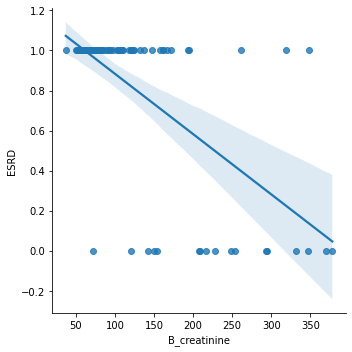

In [ ]:

#plotting the Scatter plot to check relationship
sns.lmplot(y ="ESRD", x ="B_creatinine", data = ESRD)

HERE, ITS OBVIOUS THAT THE HIGHER THE CREATININE, THE MORE LIKELY IT IS TO COME DOWN WITH ESRD 
N.B: DUMMY VARIABLE CREATED EARLIER USED ESRD AS THE BASE VALUE

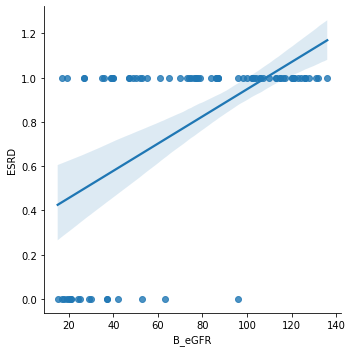

In [ ]:
#plotting the Scatter plot to check relationship
sns.lmplot(y ="ESRD", x ="B_eGFR", data = ESRD, order = 1, ci = 95)

THE HIGHER THE EGFR, THE LESS LIKELY IT IS TO COME DOWN WITH ESRD BUT  BEYOND THE TRESHOLD OF 110, THERE IS A REVERSE TREND

(array([1., 0., 0., 1., 0., 1., 3., 0., 1., 2., 1., 3., 5., 1., 0., 8., 2.,
        1., 4., 1., 3., 8., 5., 3., 3., 4., 1., 0., 3., 0., 0., 1., 2., 0.,
        3., 0., 1., 1., 0., 0., 3., 1., 0., 1., 0., 0., 1., 1., 0., 1.]),
 array([ 53.  ,  54.32,  55.64,  56.96,  58.28,  59.6 ,  60.92,  62.24,
         63.56,  64.88,  66.2 ,  67.52,  68.84,  70.16,  71.48,  72.8 ,
         74.12,  75.44,  76.76,  78.08,  79.4 ,  80.72,  82.04,  83.36,
         84.68,  86.  ,  87.32,  88.64,  89.96,  91.28,  92.6 ,  93.92,
         95.24,  96.56,  97.88,  99.2 , 100.52, 101.84, 103.16, 104.48,
        105.8 , 107.12, 108.44, 109.76, 111.08, 112.4 , 113.72, 115.04,
        116.36, 117.68, 119.  ]),
 <a list of 50 Patch objects>)

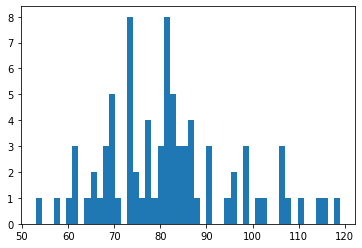

In [60]:
T = OUTCOME["BIOPSY_TIME"]
E = OUTCOME["OUTCOME_d"]
plt.hist(T, bins = 50)

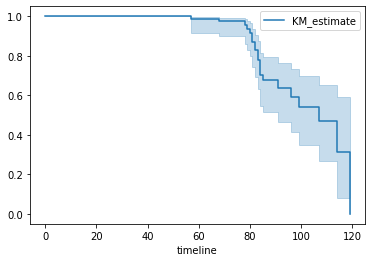

In [61]:
kmf = KaplanMeierFitter()
kmf.fit(durations = T, event_observed = E)
kmf.plot_survival_function()

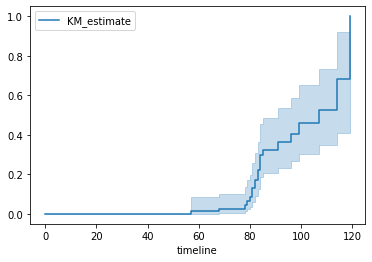

In [62]:
kmf.plot_cumulative_density() #FAILURE CURVE

In [65]:
#from lifelines.utils import median_survival_times
median_ = kmf.median_survival_time_
median_confidence_interval_ = median_survival_times(kmf.confidence_interval_)
print(median_)
print(median_confidence_interval_)

107.0
     KM_estimate_lower_0.95  KM_estimate_upper_0.95
0.5                    91.0                   119.0


Here, the median survival based on biopsy time is 107 days, which indicates that 50% of the sample live 107 days and 50% dies within this time. The 95% CI lower limit is 91 days, while the upper limit is 119 days.

(array([19.,  1., 16.,  0.,  0.,  1.,  2.,  7.,  1.,  0.,  0.,  0.,  0.,
         4.,  1.,  0.,  2.,  0.,  6.,  1.,  0.,  0.,  0., 10.,  0.,  1.,
         0.,  0.,  4.,  0.,  0.,  0.,  0.,  0.,  2.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  3.]),
 array([  6.  ,   8.28,  10.56,  12.84,  15.12,  17.4 ,  19.68,  21.96,
         24.24,  26.52,  28.8 ,  31.08,  33.36,  35.64,  37.92,  40.2 ,
         42.48,  44.76,  47.04,  49.32,  51.6 ,  53.88,  56.16,  58.44,
         60.72,  63.  ,  65.28,  67.56,  69.84,  72.12,  74.4 ,  76.68,
         78.96,  81.24,  83.52,  85.8 ,  88.08,  90.36,  92.64,  94.92,
         97.2 ,  99.48, 101.76, 104.04, 106.32, 108.6 , 110.88, 113.16,
        115.44, 117.72, 120.  ]),
 <a list of 50 Patch objects>)

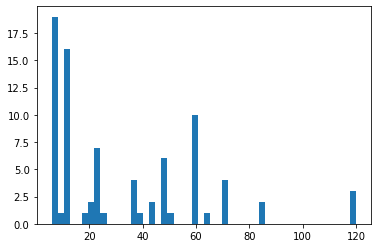

In [66]:
T = OUTCOME["FUT"]
E = ESRD["ESRD"]
plt.hist(T, bins = 50)

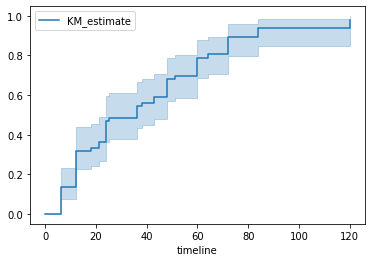

In [68]:
kmf.plot_cumulative_density()

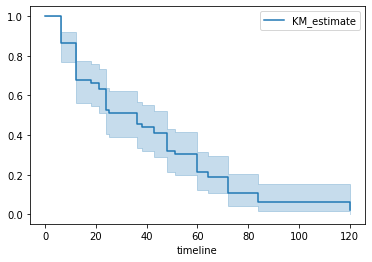

In [67]:
kmf = KaplanMeierFitter()
kmf.fit(durations = T, event_observed = E)
kmf.plot_survival_function()

In [69]:

median_ = kmf.median_survival_time_
median_confidence_interval_ = median_survival_times(kmf.confidence_interval_)
print(median_)
print(median_confidence_interval_)

36.0
     KM_estimate_lower_0.95  KM_estimate_upper_0.95
0.5                    24.0                    48.0


Here, the median survival based on follow_up time is 36 days, which indicates that 50% of the sample live 36 days and 50% dies within this time. The 95% CI lower limit is 24 days, while the upper limit is 48 days.

In [117]:
X = np.array(ESRD['URIC_ACID']).reshape(-1, 1)
y = np.array(ESRD['ESRD']).reshape(-1, 1)
  
# Separating the data into independent and dependent variable
ESRD.dropna(inplace = True)
  
# Dropping any rows with Nan values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)
  
# Splitting the data into training and testing data
regr = LinearRegression()
  
regr.fit(X_train, y_train)
regr.score(X_test, y_test)

/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


-0.5241919499595662

In [119]:
X = np.array(ESRD['URIC_ACID']).reshape(-1, 1)
y = np.array(ESRD['ESRD']).reshape(-1, 1)
  
# Separating the data into independent and dependent variable
ESRD.dropna(inplace = True)
  
# Dropping any rows with Nan values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)
  
# Splitting the data into training and testing data
regr = LinearRegression()
  
regr.fit(X_train, y_train)
regr.score(X_test, y_test)

-0.8308851007044642

In [120]:
regr.score(X_train, y_train)

0.33461610147887655

In [ ]:

print(y_test.shape, y_train.shape, X_train.shape, X_test.shape)

(25, 1) (56, 1) (56, 1) (25, 1)


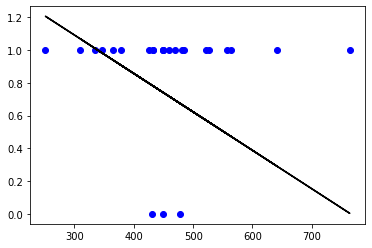

In [121]:
y_pred = regr.predict(X_test)
plt.scatter(X_test, y_test, color ='b')
plt.plot(X_test, y_pred, color ='k')


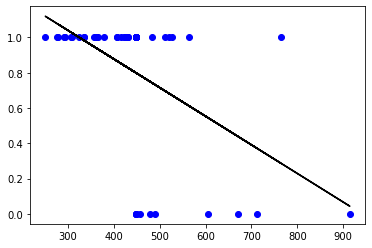

In [ ]:
y_pred = regr.predict(X_train)
plt.scatter(X_train, y_train, color ='b')
plt.plot(X_train, y_pred, color ='k')

In [ ]:
X = np.array(ESRD['B_eGFR']).reshape(-1, 1)
y = np.array(ESRD['ESRD']).reshape(-1, 1)

ESRD.dropna(inplace = True)
  
# Dropping any rows with Nan values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)
  
# Splitting the data into training and testing data
regr = LinearRegression()
  
regr.fit(X_train, y_train)
regr.score(X_test, y_test)

/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


-0.3478069835181805

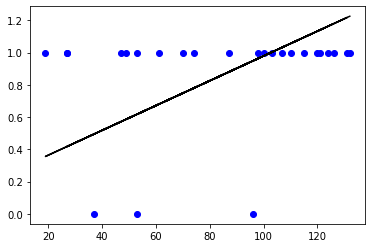

In [ ]:
y_pred = regr.predict(X_test)
plt.scatter(X_test, y_test, color ='b')
plt.plot(X_test, y_pred, color ='k')

In [172]:
 
mae = mean_absolute_error(y_true=y_test,y_pred=y_pred)
#squared True returns MSE value, False returns RMSE value.
mse = mean_squared_error(y_true=y_test,y_pred=y_pred) #default=True
rmse = mean_squared_error(y_true=y_test,y_pred=y_pred,squared=False)
  
print("MAE:",mae)
print("MSE:",mse)
print("RMSE:",rmse)

MAE: 0.12
MSE: 0.12
RMSE: 0.34641016151377546


In [173]:

# Creating independent and dependent variables.
X, y = ESRD['B_creatinine'], ESRD['ESRD']
  
# Splitting the data into training set and test set.
X_train, X_test, y_train, y_test = X[:60], X[60:], y[:60], y[60:]
  
"""
The training set is already shuffled for us, which is good as this guarantees that all
cross-validation folds will be similar.
"""
  
# Training a binary classifier.
y_train_5 = (y_train) # True for all 5s, False for all other digits.
y_test_5 = (y_test)

class Never5Classifier(BaseEstimator):
    def fit(self, X, y=None):
        pass
    def predict(self, X):
        return np.zeros((len(X), 1), dtype=bool)
  
never_5_clf = Never5Classifier()
score = cross_val_score(never_5_clf, X_train, y_train_5, cv=3, scoring="accuracy")

In [126]:
# Creating some predictions.
y_train_pred = cross_val_predict(never_5_clf, X_train, y_train_5, cv=3)

# Constructing the confusion matrix.
confusion_matrix(y_train_5, y_train_pred)

array([[14,  0],
       [46,  0]])

In [ ]:
# Finding precision and recall
precision_score(y_train_5, y_train_pred)
recall_score(y_train_5, y_train_pred)

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0.0

In [ ]:
# To compute the F1 score, simply call the f1_score() function:
f1_score(y_train_5, y_train_pred)

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1580: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))


0.0

In [116]:
x = ESRD[['AGE', 'GENDER_d', 'B_PROTEIN', 'B_ALBUMIN', 'BIOPSY_AGE', 'IgG', 'IgM', 'IgA', 'C3S', 'URIC_ACID', 'B_HEMATOCRIT', 'B_PLATELET', 'WBC', 'NEUTRO', 'LYMPHO', 'BIOPSY_TIME', 'B_PP', 
         'B_MAP', 'HEMATURIA_d', 'B_creatinine', 'B_eGFR','FUT']]
y = ESRD['ESRD']
 
# with sklearn
regr = linear_model.LinearRegression()
regr.fit(x, y)

print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)

# with statsmodels
x = sm.add_constant(x) # adding a constant
 
model = sm.OLS(y, x).fit()
predictions = model.predict(x) 
 
print_model = model.summary()
print(print_model)

Intercept: 
 1.1050419108915515
Coefficients: 
 [-1.35002343e-02  2.30073742e-01  3.04787022e-03  2.04660494e-03
  1.80881755e-02  1.62939559e-01  8.97468134e-03 -8.78523332e-02
 -2.13165771e-02 -8.09386243e-04  2.00483577e-03  6.52454178e-05
 -1.70632185e-02  4.13970188e-02 -6.09343341e-02 -2.02659186e-01
 -6.70404735e-02  2.02854180e-01  6.21360704e-02 -2.86822797e-03
  1.66122297e-03 -1.43604925e-03]
                            OLS Regression Results                            
Dep. Variable:                   ESRD   R-squared:                       0.593
Model:                            OLS   Adj. R-squared:                  0.439
Method:                 Least Squares   F-statistic:                     3.846
Date:                Sun, 23 Oct 2022   Prob (F-statistic):           2.06e-05
Time:                        19:10:16   Log-Likelihood:                -5.7262
No. Observations:                  81   AIC:                             57.45
Df Residuals:                      58   

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


 
THE PARAMATERS IN THE MODEL SHOWS THAT THERE IS MULTICOLLINEARITY IN THE DATA.

In [127]:
x = ESRD[['GENDER_d', 'BIOPSY_AGE', 'IgG', 'URIC_ACID', 'B_MAP', 'HEMATURIA_d', 'B_creatinine', 'B_eGFR']]
y = ESRD['ESRD']
 
# with sklearn
regr = linear_model.LinearRegression()
regr.fit(x, y)

print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)

# with statsmodels
x = sm.add_constant(x) # adding a constant
 
model = sm.OLS(y, x).fit()
predictions = model.predict(x) 
 
print_model = model.summary()
print(print_model)

Intercept: 
 1.1127484704925585
Coefficients: 
 [ 0.18044482  0.00414292  0.09860192 -0.00068343  0.00059665  0.04459969
 -0.00308492  0.00054586]
                            OLS Regression Results                            
Dep. Variable:                   ESRD   R-squared:                       0.480
Model:                            OLS   Adj. R-squared:                  0.422
Method:                 Least Squares   F-statistic:                     8.294
Date:                Sun, 23 Oct 2022   Prob (F-statistic):           6.77e-08
Time:                        19:24:39   Log-Likelihood:                -15.711
No. Observations:                  81   AIC:                             49.42
Df Residuals:                      72   BIC:                             70.97
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


THIS A GOOD MODEL SINCE THERE IS NO MULTICOLINEARITY, THIS MODEL IS STATISTICALLY SIGNIFICANT SINCE OUR P_VALUE IS O.O3 WHICH IS LESS THAN ALPH (0.05) WITH A NEGATIVE COEFFICIENT WHICH IMPLIES THAT THERE IS A STRONG CORRELATION WITH THE DISEASE ENTITY AND BASELINE CREATININE.

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


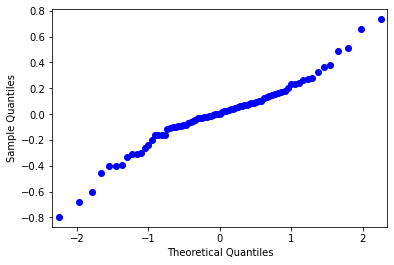

In [ ]:
#plotting residual
x = sm.add_constant(x) # adding a constant
 
model = sm.OLS(y, x).fit()
res = model.resid
 
fig = sm.qqplot(res)

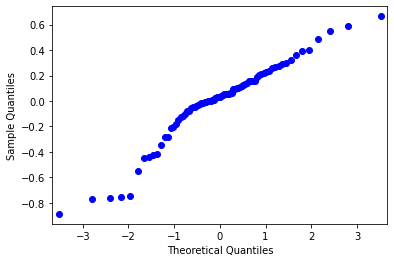

In [ ]:
fig = sm.qqplot(res, stats.t, distargs=(4,))

In [176]:
#define the predictor variables and the response variable

X = ESRD[['AGE','B_HEMATOCRIT', 'GENDER_d', 'B_PLATELET', 'URIC_ACID', 'B_creatinine', 'B_eGFR', 'C3S','IgM', 'IgA', 'IgG', 'HEMATURIA_d']]
y = ESRD['ESRD']

#split the dataset into training (70%) and testing (30%) sets
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=0) 

#instantiate the model
log_regression = LogisticRegression()

#fit the model using the training data
log_regression.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

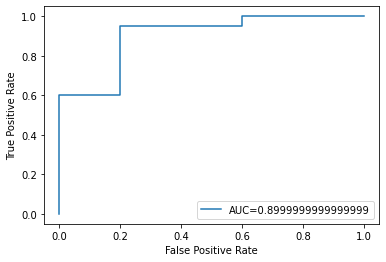

In [177]:
y_pred_proba = log_regression.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)

In [152]:
#instantiate the model
log_regression = LogisticRegression()

#fit the model using the training data
log_regression.fit(X_train,y_train)

#use model to make predictions on test data
y_pred = log_regression.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [153]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[ 3,  2],
       [ 1, 19]])

From the confusion matrix we can see that:

True positive predictions: 3
True negative predictions: 19
False positive predictions: 2
False negative predictions: 1

In [154]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.88


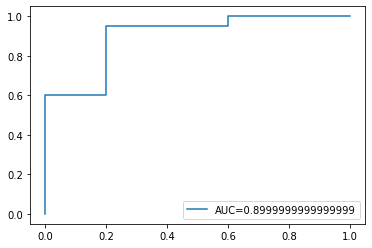

In [155]:
y_pred_proba = log_regression.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.legend(loc=4)

In [212]:
X = OUTCOME[['AGE','B_HEMATOCRIT', 'GENDERL', 'B_PLATELET', 'URIC_ACID', 'B_creatinine', 'B_eGFR', 'C3S','IgM', 'IgA', 'IgG', 'HEMATURIA_d']]
y = df1['OUTCOME']
#Fit the LDA model
model = LinearDiscriminantAnalysis()
model.fit(X, y)

LinearDiscriminantAnalysis()

In [ ]:
#Define method to evaluate model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

#evaluate model
scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
print(np.mean(scores))  

In [214]:
#define new observation
new = [38, 12.3, 1, 317, 449, 130, 74, 1, 0.5, 2, 0.5, 2]

#predict which class the new observation belongs to
print(model.predict([new]))

['NO']


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearDiscriminantAnalysis was fitted with feature names
  "X does not have valid feature names, but"


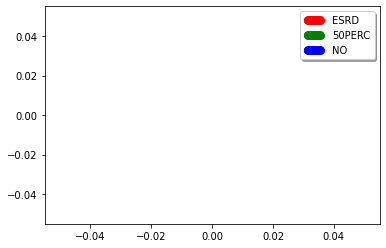

In [216]:
#define data to plot
model = LinearDiscriminantAnalysis()
data_plot = model.fit(X, y).transform(X)
target_names = df1.OUTCOME

#create LDA plot
plt.figure()
colors = ['red', 'green', 'blue']
lw = 2
for color, i, target_name in zip(colors, [0, 1, 2], target_names):
    plt.scatter(data_plot[y == i, 0], data_plot[y == i, 1], alpha=.8, color=color,
                label=target_name)

#add legend to plot
plt.legend(loc='best', shadow=True, scatterpoints=100)

In [218]:
X = OUTCOME[['AGE','B_HEMATOCRIT', 'GENDERL', 'B_PLATELET', 'URIC_ACID', 'B_creatinine', 'B_eGFR', 'C3S','IgM', 'IgA', 'IgG', 'HEMATURIA_d']]
y = df1['OUTCOME']

#Fit the QDA model
model = QuadraticDiscriminantAnalysis()
model.fit(X, y)

/usr/local/lib/python3.7/dist-packages/sklearn/discriminant_analysis.py:878: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


QuadraticDiscriminantAnalysis()

In [219]:
#Define method to evaluate model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

#evaluate model
scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
print(np.median(scores))

0.75


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=10.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=10.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=10.
  UserWarning,


In [220]:
#define new observation
new = [68, 5, 2, 917, 949, 930, 74, 3, 104, 9, 6, 10]

#predict which class the new observation belongs to
print(model.predict([new]))

['NO']


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but QuadraticDiscriminantAnalysis was fitted with feature names
  "X does not have valid feature names, but"


In [221]:
X = ESRD[['AGE','B_HEMATOCRIT', 'GENDER_d', 'B_PLATELET', 'URIC_ACID', 'B_creatinine', 'B_eGFR', 'C3S','IgM', 'IgA', 'IgG', 'HEMATURIA_d']]
y = ESRD['BIOPSY_TIME']

#define cross-validation method to evaluate model
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

#define model
model = RidgeCV(alphas=arange(0, 1, 0.01), cv=cv, scoring='neg_mean_absolute_error')

#fit model
model.fit(X, y)

#display lambda that produced the lowest test MSE
print(model.alpha_)

0.99


In [222]:

#define new observation
new = [70, 1.3, 2, 111, 960, 350, 35, 0, 1, 0, 1, 4]

#predict which class the new observation belongs to
print(model.predict([new]))

[52.63316032]


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but RidgeCV was fitted with feature names
  "X does not have valid feature names, but"


In [223]:
X = OUTCOME[['AGE','B_HEMATOCRIT', 'GENDERL', 'B_PLATELET', 'URIC_ACID', 'OUTCOME_d', 'B_eGFR', 'C3S','IgM', 'IgA', 'IgG', 'HEMATURIA_d']]
y = OUTCOME['B_creatinine']

In [ ]:
#define cross-validation method to evaluate model
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

#define model
model = LassoCV(alphas=arange(0, 1, 0.01), cv=cv, n_jobs=-1)

#fit model
model.fit(X, y)

#display lambda that produced the lowest test MSE
print(model.alpha_)

In [225]:
#define new observation
new = [70, 1.3, 2, 111, 960, 2, 35, 0, 1, 0, 1, 4]

#predict which class the new observation belongs to
print(model.predict([new]))

[352.84246201]


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LassoCV was fitted with feature names
  "X does not have valid feature names, but"


In [189]:
ESRD.apply(stats.zscore)

,AGE,BIOPSY_AGE,B_PROTEIN,B_ALBUMIN,B_HEMATOCRIT,B_PLATELET,WBC,NEUTRO,LYMPHO,URIC_ACID,B_SBP,B_DBP,B_PP,B_MAP,B_creatinine,B_eGFR,B_UPCR,BIOPSY_TIME,FUT,C3S,IgM,IgA,IgG,GENDER_d,HEMATURIA_d,ESRD
0,0.180062,-0.302677,0.732025,0.654260,0.126459,-0.077597,0.694749,0.096960,0.599289,5.355582e-16,-1.435600e+00,0.313960,-0.554631,0.756972,-0.115899,-0.569648,-1.074179,0.999981,3.038607,-1.392753,0.060547,-0.555584,1.099437,-0.591608,-1.851102,-1.940285
1,-0.018374,-0.503634,0.469358,0.388621,-0.442608,1.191917,0.339760,0.572230,-0.757750,-8.222193e-01,-8.765714e-16,-0.646239,-0.837245,-0.329266,-0.571276,0.313059,0.009812,-0.066665,0.947763,1.042060,1.531843,0.808122,0.243145,-0.591608,0.311484,0.515388
2,-0.018374,-0.604113,0.031578,0.654260,-0.158074,1.440841,1.049738,1.637375,-1.478678,-1.481734e+00,-8.765714e-16,0.819327,-0.342670,1.300090,-0.664687,0.634043,-0.513494,1.497749,0.529594,-1.392753,0.550979,-0.555584,-0.613148,-0.591608,-1.851102,0.515388
3,0.279280,-0.202198,0.907137,1.185539,0.695527,0.594499,1.878046,1.974446,0.910278,5.355582e-16,1.385559e-01,-0.039798,0.222559,-0.193486,-0.839832,1.222513,-0.962042,-0.279995,3.038607,-1.392753,0.550979,-1.919290,1.099437,-0.591608,-1.851102,0.515388
4,-0.415245,-0.905550,-1.106650,-1.338036,0.624394,-0.090043,-0.666043,-0.698528,0.104535,5.355582e-16,9.675785e-01,0.111813,0.151905,0.078073,-0.641334,1.329508,0.869529,0.004444,3.038607,0.230456,1.531843,0.808122,-0.613148,1.690309,-1.851102,0.515388
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76,-0.415245,-0.101719,0.000000,1.185539,2.189330,-0.687461,-0.015229,-0.277189,1.518118,7.229297e-01,-7.940944e-01,0.566644,0.363866,0.553302,-0.115899,-0.114920,-0.737768,0.431103,-0.411285,1.042060,-1.410749,-0.555584,-0.613148,1.690309,0.311484,0.515388
77,-0.712898,-0.805071,-0.756426,-1.072396,-1.011676,0.880761,-0.754790,-0.644597,-0.573985,5.355582e-16,1.461044e+00,0.566644,-0.978552,1.367980,0.888267,-1.211616,2.028279,1.782188,-0.794607,0.230456,0.550979,-0.555584,-0.613148,-0.591608,0.311484,-1.940285
78,-0.018374,0.099238,0.907137,0.388621,0.268726,-0.550553,-0.370219,-0.674933,1.235402,-4.736186e-01,-2.808900e-01,0.263423,0.293212,0.145963,-0.477865,-0.007926,-0.849905,0.075554,-0.515828,-1.392753,-1.410749,-0.555584,-0.613148,-0.591608,-1.851102,0.515388
79,-1.407423,-1.206986,0.000000,1.052719,0.339860,1.017670,-0.044812,0.147521,-0.390219,-1.330988e+00,-1.188867e+00,-0.191408,0.646480,-0.668715,-0.746421,1.088770,-0.812526,-0.919982,0.355357,1.042060,0.550979,0.808122,-0.613148,-0.591608,0.311484,0.515388


Text(0.5, 1.0, 'creatinine')

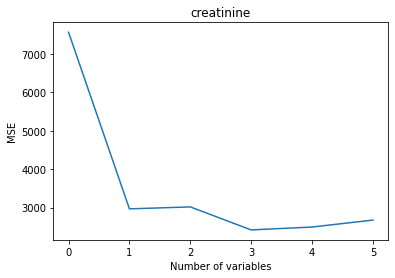

In [226]:
#scale predictor variables
pca = PCA()
X_reduced = pca.fit_transform(scale(X))

#define cross validation method
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

regr = LinearRegression()
mse = []

# Calculate MSE with only the intercept
score = -1*model_selection.cross_val_score(regr,
           np.ones((len(X_reduced),1)), y, cv=cv,
           scoring='neg_mean_squared_error').mean()    
mse.append(score)

# Calculate MSE using cross-validation, adding one component at a time
for i in np.arange(1, 6):
    score = -1*model_selection.cross_val_score(regr,
               X_reduced[:,:i], y, cv=cv, scoring='neg_mean_squared_error').mean()
    mse.append(score)
    
# Plot cross-validation results    
plt.plot(mse)
plt.xlabel('Number of variables')
plt.ylabel('MSE')
plt.title('creatinine')

In [227]:
np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)


array([22.36, 37.44, 51.55, 60.17, 68.21, 74.98, 81.45, 86.69, 91.  ,
       94.92, 97.56, 99.99])

In [228]:
#split the dataset into training (70%) and testing (30%) sets
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=0) 

#scale the training and testing data
X_reduced_train = pca.fit_transform(scale(X_train))
X_reduced_test = pca.transform(scale(X_test))[:,:1]

#train PCR model on training data 
regr = LinearRegression()
regr.fit(X_reduced_train[:,:1], y_train)

#calculate RMSE
pred = regr.predict(X_reduced_test)
np.sqrt(mean_squared_error(y_test, pred))

53.60001287523082

We can see that the test RMSE turns out to be 53.6000123. This is the average deviation between the predicted value for creatinine and the observed value of creatinine for the observations in the testing set.

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
30 fits failed out of a total of 30.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/cross_decomposition/_pls.py", line 353, in fit
    pinv2(np.dot(self.x_loadings_.T, self.x_weights_), check_finite=False),
  File "/usr/local/lib/python3.7/dist-packages/scipy/linalg/basic.py", line 1316, in pinv
    u, s, vh = decomp_svd.svd(a, full_matrices=Fal

Text(0.5, 1.0, 'OUTCOME')

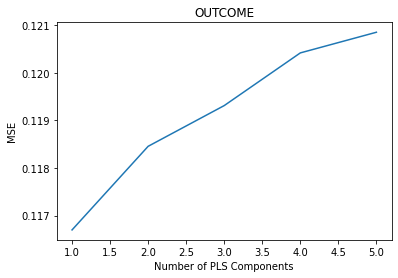

In [229]:
X = ESRD[['AGE','B_HEMATOCRIT', 'GENDER_d', 'B_PLATELET', 'URIC_ACID', 'B_creatinine', 'B_eGFR', 'C3S','IgM', 'IgA', 'IgG', 'HEMATURIA_d']]
y = ESRD['ESRD']

#define cross-validation method
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

mse = []
n = len(X)

# Calculate MSE with only the intercept
score = -1*model_selection.cross_val_score(PLSRegression(n_components=1),
           np.ones((n,1)), y, cv=cv, scoring='neg_mean_squared_error').mean()    
mse.append(score)

# Calculate MSE using cross-validation, adding one component at a time
for i in np.arange(1, 6):
    pls = PLSRegression(n_components=i)
    score = -1*model_selection.cross_val_score(pls, scale(X), y, cv=cv,
               scoring='neg_mean_squared_error').mean()
    mse.append(score)

#plot test MSE vs. number of components
plt.plot(mse)
plt.xlabel('Number of PLS Components')
plt.ylabel('MSE')
plt.title('OUTCOME')


In [230]:
#split the dataset into training (70%) and testing (30%) sets
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=0) 

#calculate RMSE
pls = PLSRegression(n_components=2)
pls.fit(scale(X_train), y_train)

np.sqrt(mean_squared_error(y_test, pls.predict(scale(X_test))))


0.2826777787243218

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
30 fits failed out of a total of 30.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/cross_decomposition/_pls.py", line 353, in fit
    pinv2(np.dot(self.x_loadings_.T, self.x_weights_), check_finite=False),
  File "/usr/local/lib/python3.7/dist-packages/scipy/linalg/basic.py", line 1316, in pinv
    u, s, vh = decomp_svd.svd(a, full_matrices=Fal

Text(0.5, 1.0, 'OUTCOME')

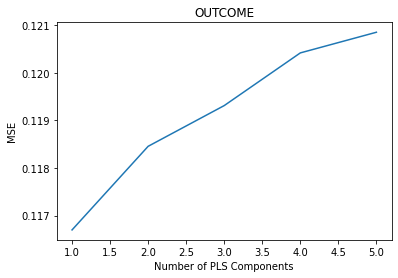

In [249]:
x = ESRD[['AGE', 'GENDER_d', 'B_PROTEIN', 'B_ALBUMIN', 'BIOPSY_AGE', 'IgG', 'IgM', 'IgA', 'C3S', 'URIC_ACID', 'B_HEMATOCRIT', 'B_PLATELET', 'WBC', 'NEUTRO', 'LYMPHO', 'BIOPSY_TIME', 'B_PP', 
         'B_MAP', 'HEMATURIA_d', 'B_creatinine', 'B_eGFR','FUT']]
y = ESRD['ESRD']

#define cross-validation method
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

mse = []
n = len(X)

# Calculate MSE with only the intercept
score = -1*model_selection.cross_val_score(PLSRegression(n_components=1),
           np.ones((n,1)), y, cv=cv, scoring='neg_mean_squared_error').mean()    
mse.append(score)

# Calculate MSE using cross-validation, adding one component at a time
for i in np.arange(1, 6):
    pls = PLSRegression(n_components=i)
    score = -1*model_selection.cross_val_score(pls, scale(X), y, cv=cv,
               scoring='neg_mean_squared_error').mean()
    mse.append(score)

#plot test MSE vs. number of components
plt.plot(mse)
plt.xlabel('Number of PLS Components')
plt.ylabel('MSE')
plt.title('OUTCOME')

In [250]:
# building the model and fitting the data
log_reg = sm.Logit(ytrain, Xtrain).fit()
print(log_reg.summary())

Optimization terminated successfully.
         Current function value: 0.255829
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                   ESRD   No. Observations:                   81
Model:                          Logit   Df Residuals:                       70
Method:                           MLE   Df Model:                           10
Date:                Sun, 23 Oct 2022   Pseudo R-squ.:                  0.5021
Time:                        20:34:14   Log-Likelihood:                -20.722
converged:                       True   LL-Null:                       -41.617
Covariance Type:            nonrobust   LLR p-value:                 8.172e-06
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
AGE              0.0228      0.039      0.587      0.557      -0.053       0.099
B_HEMATOCRIT     0.2034

In [257]:
# defining the dependent and independent variables
Xtest = ESRD[['AGE','B_HEMATOCRIT', 'B_PLATELET', 'URIC_ACID', 'B_creatinine', 'B_eGFR', 'C3S','IgM', 'IgA', 'IgG', 'HEMATURIA_d']]
ytest = ESRD['ESRD']
  
# performing predictions on the test datdaset
yhat = log_reg.predict(Xtest)
prediction = list(map(round, yhat))
  
# comparing original and predicted values of y
print('Actual values', list(ytest.values))
print('Predictions :', prediction)

Actual values [0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1]
Predictions : [1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1]


In [261]:
x = ESRD[['AGE', 'IgG', 'IgM', 'IgA', 'C3S', 'URIC_ACID', 'B_HEMATOCRIT', 'B_PLATELET', 'WBC', 'NEUTRO', 'LYMPHO', 'BIOPSY_TIME', 'B_PP', 
         'B_MAP', 'HEMATURIA_d', 'B_creatinine', 'B_eGFR','FUT']]
y = ESRD['ESRD']
# building the model and fitting the data
logreg = sm.Logit(ytrain, Xtrain).fit()

Optimization terminated successfully.
         Current function value: 0.255829
         Iterations 8


In [262]:
print(logreg.summary())

                           Logit Regression Results                           
Dep. Variable:                   ESRD   No. Observations:                   81
Model:                          Logit   Df Residuals:                       70
Method:                           MLE   Df Model:                           10
Date:                Sun, 23 Oct 2022   Pseudo R-squ.:                  0.5021
Time:                        20:38:41   Log-Likelihood:                -20.722
converged:                       True   LL-Null:                       -41.617
Covariance Type:            nonrobust   LLR p-value:                 8.172e-06
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
AGE              0.0228      0.039      0.587      0.557      -0.053       0.099
B_HEMATOCRIT     0.2034      0.299      0.680      0.496      -0.383       0.790
B_PLATELET       0.0001      0.005      0.01

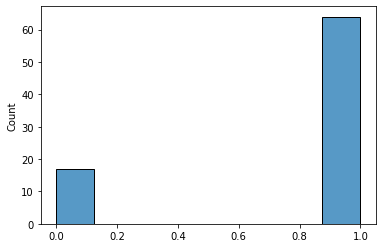

In [182]:
sns.histplot(ytest.values)

In [265]:

# confusion matrix
cm = confusion_matrix(ytest, prediction) 
print ("Confusion Matrix : \n", cm) 
  
# accuracy score of the model
print('Test accuracy = ', accuracy_score(ytest, prediction))

Confusion Matrix : 
 [[12  5]
 [ 4 60]]
Test accuracy =  0.8888888888888888


In [271]:

# confusion matrix
cm = confusion_matrix(ytest, prediction) 
print ("Confusion Matrix : \n", cm) 
  
#f1_score score of the model
print('f1 score = ', f1_score(ytest, prediction))

Confusion Matrix : 
 [[12  5]
 [ 4 60]]
f1 score =  0.9302325581395349


In [272]:
# confusion matrix
cm = confusion_matrix(ytest, prediction) 
print ("Confusion Matrix : \n", cm) 
  
#prescision score of the model
print('prescision score = ', precision_score(ytest, prediction))

Confusion Matrix : 
 [[12  5]
 [ 4 60]]
prescision score =  0.9230769230769231


In [275]:

# confusion matrix
cm = confusion_matrix(ytest, prediction) 
print ("Confusion Matrix : \n", cm) 
  
#recall score of the model
print('Test recall score = ', recall_score(ytest, prediction))

Confusion Matrix : 
 [[12  5]
 [ 4 60]]
Test recall score =  0.9375


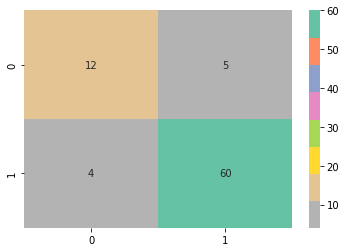

In [266]:
sns.heatmap(cm, annot = True, cmap = 'Set2_r')